#New York Airbnb Price Prediction

Data Source: http://insideairbnb.com/get-the-data/

Goal: Predict Airbnb prices and find important features

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd

file_path = '/content/drive/MyDrive/DS5110 IDMP/data/listings.csv'
raw_price_data = pd.read_csv(file_path)
raw_price_data.head()

<ipython-input-96-1d8c9f59adae>:4: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_price_data = pd.read_csv(file_path)


id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20221204162430   2022-12-05   
1  5203  https://www.airbnb.com/rooms/5203  20221204162430   2022-12-05   
2  5136  https://www.airbnb.com/rooms/5136  20221204162430   2022-12-04   
3  5121  https://www.airbnb.com/rooms/5121  20221204162430   2022-12-05   
4  6848  https://www.airbnb.com/rooms/6848  20221204162430   2022-12-05   

            source                                      name  \
0      city scrape                     Skylit Midtown Castle   
1  previous scrape        Cozy Clean Guest Room - Family Apt   
2      city scrape  Spacious Brooklyn Duplex, Patio + Garden   
3      city scrape                           BlissArtsSpace!   
4      city scrape          Only 2 stops to Manhattan studio   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Our best guests are seeking a safe, clean, spa...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  One room available for rent in a 2 bedroom apt...   
4  Comfortable studio apartment with super comfor...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Our neighborhood is full of restaurants and ca...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/103776/b37157...     7490   
2  https://a0.muscache.com/pictures/miso/Hosting-...     7378   
3  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
4  https://a0.muscache.com/pictures/e4f031a7-f146...    15991   

                                  host_url      host_name  host_since  \
0   https://www.airbnb.com/users/show/2845       Jennifer  2008-09-09   
1   https://www.airbnb.com/users/show/7490      MaryEllen  2009-02-05   
2   https://www.airbnb.com/users/show/7378        Rebecca  2009-02-03   
3   https://www.airbnb.com/users/show/7356          Garon  2009-02-03   
4  https://www.airbnb.com/users/show/15991  Allen & Irina  2009-05-06   

  host_location                                         host_about  \
0  New York, NY  A New Yorker since (Phone number hidden by Air...   
1  New York, NY  Welcome to family life with my oldest two away...   
2  New York, NY  Rebecca is an artist/designer, and Henoch is i...   
3  New York, NY   I am an artist(painter, filmmaker) and curato...   
4  New York, NY  We love to travel. When we travel we like to s...   

  host_response_time host_response_rate host_acceptance_rate  \
0       within a day                72%                  22%   
1                NaN                NaN                  NaN   
2                NaN                NaN                  50%   
3       within a day                90%                  82%   
4     within an hour               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/50fc5...   
1                 f  https://a0.muscache.com/im/users/7490/profile_...   
2                 f  https://a0.muscache.com/im/users/7378/profile_...   
3                 t  https://a0.muscache.com/im/pictures/user/72a61...   
4                 f  https://a0.muscache.com/im/users/15991/profile...   

                                    host_picture_url  host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/50fc5...             Midtown   
1  https://a0.muscache.com/im/users/7490/profile_...     Upper West Side   
2  https://a0.muscache.com/im/users/7378/profile_...   Greenwood Heights   
3  https://a0.muscache.com/im/pictures/user/72a61...  Bedford-Stuyvesant   
4  https://a0.muscache.com/im/user

In [97]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
raw_price_data.head().T

0  \
id                                                                                         2595   
listing_url                                                   https://www.airbnb.com/rooms/2595   
scrape_id                                                                        20221204162430   
last_scraped                                                                         2022-12-05   
source                                                                              city scrape   
name                                                                      Skylit Midtown Castle   
description                                   Beautiful, spacious skylit studio in the heart...   
neighborhood_overview                         Centrally located in the heart of Manhattan ju...   
picture_url                                   https://a0.muscache.com/pictures/f0813a11-40b2...   
host_id                                                                                    2845   
host_url                                                 https://www.airbnb.com/users/show/2845   
host_name                                                                              Jennifer   
host_since                                                                           2008-09-09   
host_location                                                                      New York, NY   
host_about                                    A New Yorker since (Phone number hidden by Air...   
host_response_time                                                                 within a day   
host_response_rate                                                                          72%   
host_acceptance_rate                                                                        22%   
host_is_superhost                                                                             f   
host_thumbnail_url                            https://a0.muscache.com/im/pictures/user/50fc5...   
host_picture_url                              https://a0.muscache.com/im/pictures/user/50fc5...   
host_neighbourhood                                                                      Midtown   
host_listings_count                                                                         6.0   
host_total_listings_count                                                                   9.0   
host_verifications                                             ['email', 'phone', 'work_email']   
host_has_profile_pic                                                                          t   
host_identity_verified                                                                        t   
neighbourhood                                                           New York, United States   
neighbourhood_cleansed                                                                  Midtown   
neighbourhood_group_cleansed                                                          Manhattan   
latitude                                                                               40.75356   
longitude                                                                             -73.98559   
property_type                                                                Entire rental unit   
room_type                                                                       Entire home/apt   
accommodates                                                                                  1   
bathrooms                                                                                   NaN   
bathrooms_text                                                                           1 bath   
bedrooms                                                                                    NaN   
beds                                                                                        1.0   
amenities                                     ["Carbon monoxide alarm", "Stove", "Bathtub", ...   
price                              

## Exploratory Data Analysis and Preprocessing


In [98]:
raw_price_data.shape, raw_price_data.columns

((41533, 75),
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
        'description', 'neighborhood_overview', 'picture_url', 'host_id',
        'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
        'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
        'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
        'maximum_minimum_nights', 'minimum_maximum_nights',
        'maximum_maximum_nights', 'minimum_nights_avg_ntm',
        

There are too many features. We won't use all of them.

Personal information about the host - host name, location, neighborhood should not be fed to a model in order to prevent any biases.

Scraping information is also not relevant for this particular problem.

Neighbourhood has a grouped cleansed version so no need of the actual.

### Don't select not so useful features

In [99]:
cols = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost',
        'host_has_profile_pic', 'host_identity_verified',
        'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bathrooms',
        'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability',
        'availability_30', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location',
        'review_scores_value', 
        'license', 'instant_bookable',
        'reviews_per_month']

In [100]:
price_data = raw_price_data.loc[:, cols]

### Check Null Values

In [101]:
nulls = pd.DataFrame(price_data.isna().sum())
rows, cols = price_data.shape
for idx, row in nulls.iterrows():
  
  if row[0] >0:
    print(idx, row[0], "-", round((row[0]/rows)*100,2))

host_response_time 13645 - 32.85
host_response_rate 13645 - 32.85
host_acceptance_rate 12211 - 29.4
host_is_superhost 29 - 0.07
host_has_profile_pic 5 - 0.01
host_identity_verified 5 - 0.01
bathrooms_text 77 - 0.19
bathrooms 41533 - 100.0
bedrooms 3822 - 9.2
beds 941 - 2.27
calendar_updated 41533 - 100.0
review_scores_rating 9393 - 22.62
review_scores_accuracy 9841 - 23.69
review_scores_cleanliness 9831 - 23.67
review_scores_checkin 9845 - 23.7
review_scores_communication 9836 - 23.68
review_scores_location 9848 - 23.71
review_scores_value 9848 - 23.71
license 41532 - 100.0
reviews_per_month 9393 - 22.62


In [102]:
price_data['calendar_updated'].unique()

array([nan])

In [103]:
price_data['bathrooms'].unique()

array([nan])

In [104]:
price_data['license'].unique()

array([nan, '41662/AL'], dtype=object)

So we can drop the columns - calendar_updated and bathrooms - as they are all/mostly null.

In [105]:
price_data.drop(columns=['calendar_updated', 'bathrooms', 'license'], inplace=True)

### Check Data Types

In [106]:
price_data.dtypes

host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_has_profile_pic             object
host_identity_verified           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
minimum_nights                    int64
maximum_nights                    int64
has_availability                 object
availability_30                   int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64


In [107]:
price_data['instant_bookable'].unique() # need to convert to bool

array(['f', 't'], dtype=object)

In [108]:
price_data['host_response_time'].unique() # convert to categorical

array(['within a day', nan, 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

In [109]:
price_data['host_response_rate'].unique() # need to remove percentages and convert to int - impute nans

array(['72%', nan, '90%', '100%', '94%', '33%', '80%', '60%', '91%',
       '99%', '0%', '93%', '67%', '83%', '50%', '88%', '78%', '92%',
       '63%', '75%', '82%', '86%', '70%', '71%', '89%', '96%', '40%',
       '73%', '20%', '98%', '97%', '64%', '85%', '87%', '25%', '62%',
       '43%', '84%', '56%', '58%', '95%', '38%', '13%', '10%', '22%',
       '65%', '17%', '14%', '44%', '81%', '79%', '57%', '61%', '77%',
       '69%', '26%', '55%', '76%', '30%', '29%', '46%', '68%', '31%',
       '74%', '53%', '54%', '41%', '51%'], dtype=object)

In [110]:
price_data['host_acceptance_rate'].unique() # need to remove percentages and convert to int - impute nans

array(['22%', nan, '50%', '82%', '100%', '13%', '54%', '98%', '96%',
       '97%', '0%', '83%', '95%', '86%', '85%', '46%', '40%', '67%',
       '10%', '25%', '99%', '87%', '88%', '33%', '38%', '20%', '61%',
       '73%', '60%', '65%', '64%', '30%', '94%', '89%', '91%', '93%',
       '78%', '35%', '5%', '36%', '75%', '53%', '43%', '39%', '70%',
       '80%', '92%', '23%', '17%', '49%', '76%', '63%', '69%', '57%',
       '74%', '62%', '79%', '21%', '90%', '84%', '14%', '71%', '81%',
       '77%', '55%', '72%', '15%', '29%', '44%', '45%', '47%', '19%',
       '56%', '68%', '28%', '52%', '59%', '34%', '48%', '27%', '18%',
       '66%', '58%', '7%', '42%', '11%', '32%', '16%', '51%', '26%',
       '12%', '41%', '37%', '4%', '8%', '31%', '9%', '6%', '24%'],
      dtype=object)

In [111]:
price_data['host_is_superhost'].unique() # need to convert to bool - impute nans

array(['f', 't', nan], dtype=object)

In [112]:
price_data['host_has_profile_pic'].unique() # need to convert to bool - impute nans

array(['t', 'f', nan], dtype=object)

In [113]:
price_data['host_identity_verified'].unique() # need to convert to bool - impute nans

array(['t', 'f', nan], dtype=object)

Also change instant_bookable and has_availability to bool

In [114]:
price_data['neighbourhood_group_cleansed'].unique() # one hot or word to vec

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [115]:
price_data['property_type'].unique() # too many - room type is cleaned version of this so drop

array(['Entire rental unit', 'Private room in rental unit',
       'Private room in condo', 'Entire guest suite',
       'Private room in loft', 'Entire loft', 'Private room in townhouse',
       'Private room in home', 'Entire condo', 'Entire home',
       'Entire townhouse', 'Room in boutique hotel',
       'Entire serviced apartment', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Private room in guest suite',
       'Shared room in loft', 'Shared room in rental unit',
       'Private room in houseboat', 'Shared room in home', 'Private room',
       'Entire place', 'Private room in guesthouse', 'Boat',
       'Room in aparthotel', 'Room in serviced apartment',
       'Entire cottage', 'Private room in religious building',
       'Private room in serviced apartment', 'Cave', 'Tiny home',
       'Entire bungalow', 'Shared room in condo', 'Floor',
       'Room in hotel', 'Private room in hostel',
       'Shared room in townhouse', 'Houseboat',
       'Private room in

In [116]:
property_map = {
  'Apartment': ['Entire rental unit', 'Private room in rental unit', 'Entire serviced apartment', 'Shared room in rental unit',
               'Room in aparthotel', 'Room in serviced apartment', 'Private room in serviced apartment', 'Entire home/apt',
               'Shared room in serviced apartment'], 
 "House/Villa": ['Private room in condo', 'Private room in loft','Entire loft', 'Private room in townhouse',
                 'Private room in home','Entire condo', 'Entire home','Entire townhouse','Entire guesthouse', 'Shared room in loft', 'Shared room in home',
                 'Entire place', 'Private room in guesthouse', 'Entire cottage','Tiny home', 'Entire bungalow', 'Shared room in condo', 'Shared room in townhouse'
                 'Private room in bungalow', 'Entire villa', 'Private room in villa', 'Private room in in-law', 'Shared room in guesthouse',
                 'Private room in tiny home', 'Private room in vacation home', 'Shared room in bungalow', 'Private room in earthen home', 'Private room in cottage',
                 'Entire vacation home', 'Shared room in vacation home', 'Shared room'],
 "Hotel": ['Entire guest suite', 'Room in boutique hotel','Private room in bed and breakfast', 'Private room in guest suite', 'Private room', 
           'Room in hotel', 'Private room in hostel', 'Private room in resort', 'Shared room in guest suite', 'Entire bed and breakfast',
           'Room in resort', 'Shared room in bed and breakfast', 'Private room in dorm', 'Room in bed and breakfast'], 
 "Other": ['Private room in houseboat', 'Boat', 'Private room in religious building', 'Cave', 'Floor', 'Houseboat', 'Shared room in floor', 
           'Private room in floor', 'Private room in casa particular', 'Private room in tent', 'Private room in farm stay', 'Private room in barn',
           'Lighthouse', 'Private room in train', 'Barn', 'Private room in lighthouse', 'Casa particular', 'Camper/RV', 'Private room in camper/rv', 
           'Private room in kezhan', 'Castle', 'Tent', 'Private room in minsu', 'Private room in tower', 'Shared room in casa particular', 
           "Shared room in shepherd's hut"]
 }

def map_to_property(s: str):
  for key, li in property_map.items():
    if s in property_map[key]:
      return key

price_data['property_type'] = price_data['property_type'].apply(map_to_property)

In [117]:
price_data['property_type'].value_counts()

Apartment      29870
House/Villa     9355
Hotel           2120
Other            174
Name: property_type, dtype: int64

In [118]:
# price_data.drop(columns=['property_type'], inplace=True)

In [119]:
price_data['room_type'].unique() # Basically cleaned property type? So drop property type

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [120]:
price_data['bathrooms_text'].unique() # change to numeric - impute nans

array(['1 bath', '1 shared bath', '1.5 baths', nan, '1 private bath',
       '2 baths', '2.5 baths', '3 baths', '1.5 shared baths',
       '2 shared baths', 'Half-bath', '0 baths', '4 baths',
       '0 shared baths', 'Shared half-bath', 'Private half-bath',
       '5.5 baths', '4.5 baths', '2.5 shared baths', '3.5 baths',
       '15.5 baths', '5 baths', '3 shared baths', '4 shared baths',
       '6 baths', '3.5 shared baths', '4.5 shared baths', '6.5 baths',
       '7 baths', '6 shared baths', '8 baths'], dtype=object)

In [121]:
price_data['amenities'].unique() # bag of words? word2vec?

array(['["Carbon monoxide alarm", "Stove", "Bathtub", "TV", "Kitchen", "Iron", "Long term stays allowed", "Essentials", "Bed linens", "Self check-in", "Free street parking", "Keypad", "Refrigerator", "Ethernet connection", "Extra pillows and blankets", "Cleaning available during stay", "Dedicated workspace", "Air conditioning", "Coffee maker", "Smoke alarm", "Heating", "Hot water", "Wifi", "Oven", "Luggage dropoff allowed", "Paid parking off premises", "Cooking basics", "Hangers", "Baking sheet", "Dishes and silverware", "Fire extinguisher", "Hair dryer"]',
       '["Hair dryer", "Smoke alarm", "Carbon monoxide alarm", "Shampoo", "Heating", "Hot water", "Wifi", "Fire extinguisher", "Free street parking", "Elevator", "Paid parking off premises", "Host greets you", "Breakfast", "Essentials", "Air conditioning"]',
       '["HDTV with Disney+, HBO Max, standard cable, Roku, Netflix", "Smoke alarm", "Carbon monoxide alarm", "Private backyard \\u2013 Fully fenced", "Outdoor dining area", "Wa

## converting data types and removing unecessary string stuff

In [122]:
def convert_str_to_bool(var: str):
  
  if var == 't':
    return True
  else:
    return False

def remove_char_from_str(var, chars):
  
  if not pd.isnull(var):
    for char in chars:
      var = var.replace(char, '')
    return float(var)
  
  return var
  
def baths_str_to_num(var: str):
  
  if not pd.isnull(var):
    words = var.lower().split(' ')

    if 'half-bath' in words:
      return 0.5
    else:
      return float(words[0])
  
  return var


price_data['instant_bookable'] = price_data['instant_bookable'].apply(convert_str_to_bool).astype(float)
price_data['host_is_superhost'] = price_data['host_is_superhost'].apply(convert_str_to_bool).astype(float)
price_data['host_has_profile_pic'] = price_data['host_has_profile_pic'].apply(convert_str_to_bool).astype(float)
price_data['host_identity_verified'] = price_data['host_identity_verified'].apply(convert_str_to_bool).astype(float)
price_data['has_availability'] = price_data['has_availability'].apply(convert_str_to_bool).astype(float)

price_data['host_response_rate'] = price_data['host_response_rate'].apply(remove_char_from_str, chars=['%'])
price_data['host_response_rate'] = price_data['host_response_rate']/100
price_data['host_acceptance_rate'] = price_data['host_acceptance_rate'].apply(remove_char_from_str, chars=['%'])
price_data['host_acceptance_rate'] = price_data['host_acceptance_rate']/100

price_data['price'] = price_data['price'].apply(remove_char_from_str, chars=['$',','])

price_data['baths_cleaned'] = price_data['bathrooms_text'].apply(baths_str_to_num)
price_data.drop(columns=['bathrooms_text'], inplace = True)

In [123]:
price_data.head().T

0  \
host_response_time                                                 within a day   
host_response_rate                                                         0.72   
host_acceptance_rate                                                       0.22   
host_is_superhost                                                           0.0   
host_has_profile_pic                                                        1.0   
host_identity_verified                                                      1.0   
neighbourhood_group_cleansed                                          Manhattan   
latitude                                                               40.75356   
longitude                                                             -73.98559   
property_type                                                         Apartment   
room_type                                                       Entire home/apt   
accommodates                                                                  1   
bedrooms                                                                    NaN   
beds                                                                        1.0   
amenities                     ["Carbon monoxide alarm", "Stove", "Bathtub", ...   
price                                                                     175.0   
minimum_nights                                                               30   
maximum_nights                                                             1125   
has_availability                                                            1.0   
availability_30                                                              30   
number_of_reviews                                                            49   
review_scores_rating                                                       4.68   
review_scores_accuracy                                                     4.73   
review_scores_cleanliness                                                  4.63   
review_scores_checkin                                                      4.77   
review_scores_communication                                                 4.8   
review_scores_location                                                     4.81   
review_scores_value                                                         4.4   
instant_bookable                                                            0.0   
reviews_per_month                                                          0.31   
baths_cleaned                                                               1.0   

                                                                              1  \
host_response_time                                                          NaN   
host_response_rate                                                          NaN   
host_acceptance_rate                                                        NaN   
host_is_superhost                                                           0.0   
host_has_profile_pic                                                        1.0   
host_identity_verified                                                      1.0   
neighbourhood_group_cleansed                                          Manhattan   
latitude                                                                40.8038   
longitude                                                             -73.96751   
property_type                                                         Apartment   
room_type                                                          Private room   
accommodates                                                                  1   
bedrooms                                                                    1.0   
beds                                                                        1.0   
amenities                     ["Hair dryer", "Smoke alarm", "Carbon monoxide...   
price                                                                      75.0   
minimum_ni

## Looking at distribution of Data

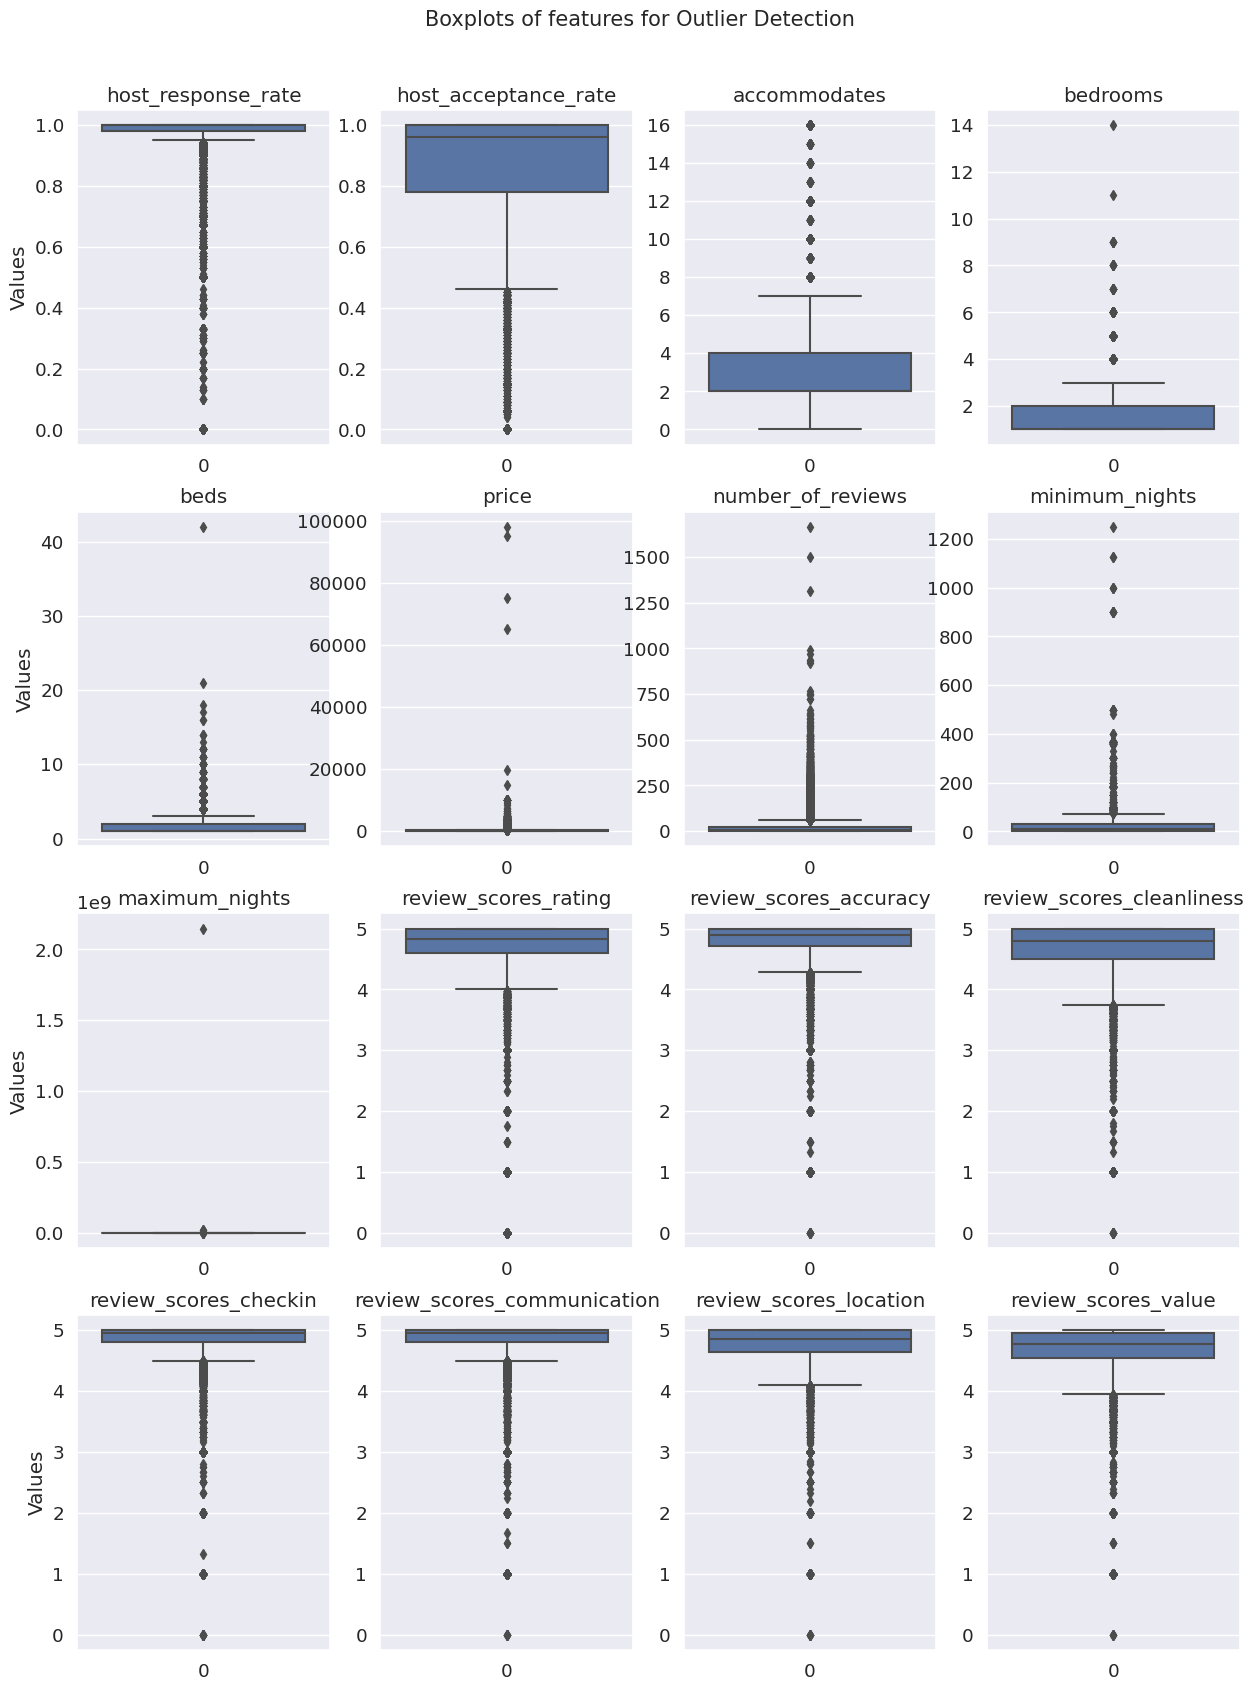

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['host_response_rate','host_acceptance_rate', 'accommodates', 'bedrooms',
                   'beds', 'price', 'number_of_reviews', 'minimum_nights',
                   'maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location','review_scores_value'
                   ]

fig, axs = plt.subplots(4, 4,  figsize=(15,20))
fig.suptitle('Boxplots of features for Outlier Detection', y=0.93, size=15)
axs = axs.flatten()
for i, cols  in enumerate(numeric_columns):
        if i % 4 == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data = price_data[cols], orient='v', ax=axs[i])
        axs[i].set_title(cols)

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

def histogram_plot(title, data):

  data = data.value_counts()

  x = list(data.keys())
  x = x[::-1]
    
  y = list(data)
  y = y[::-1]

  fig, ax = plt.subplots(1, 1)
  
  plt.barh(x,y)
  plt.title(title)

  return fig, ax

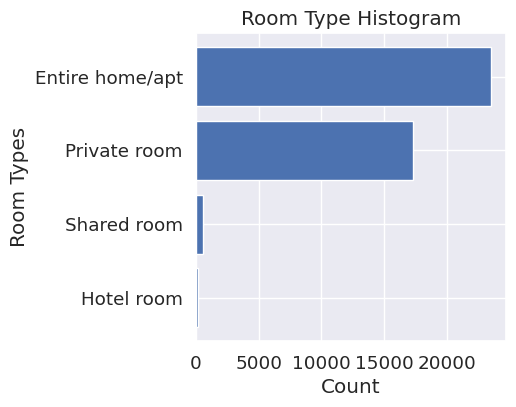

In [126]:
fig, ax = histogram_plot('Room Type Histogram', price_data['room_type'])
fig.set_size_inches(4, 4)
ax.set_xlabel('Count')
ax.set_ylabel('Room Types');

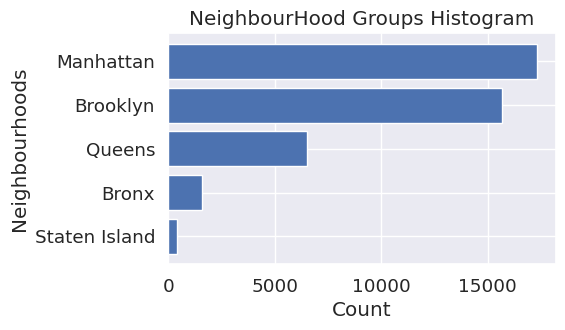

In [127]:
fig, ax = histogram_plot('NeighbourHood Groups Histogram', price_data['neighbourhood_group_cleansed'])
fig.set_size_inches(5, 3)
ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhoods');

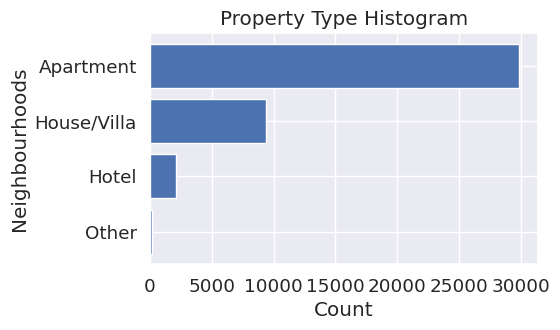

In [128]:
fig, ax = histogram_plot('Property Type Histogram', price_data['property_type'])
fig.set_size_inches(5, 3)
ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhoods');

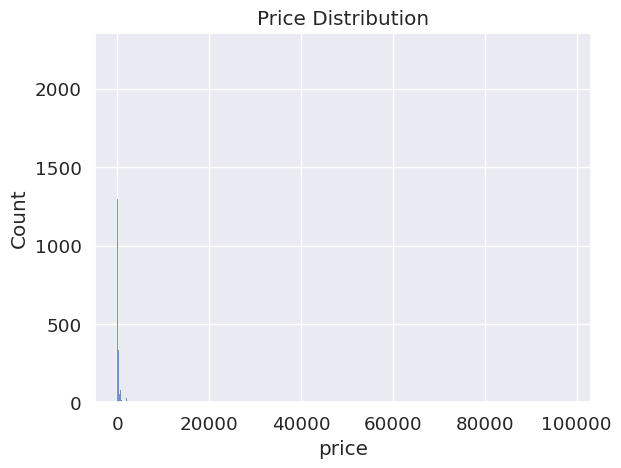

In [129]:
import seaborn as sns

sns.histplot(price_data['price']).set(title = 'Price Distribution');

Highly skewed data 

In [130]:
import numpy as np
log_prices = price_data['price'].apply(np.log)

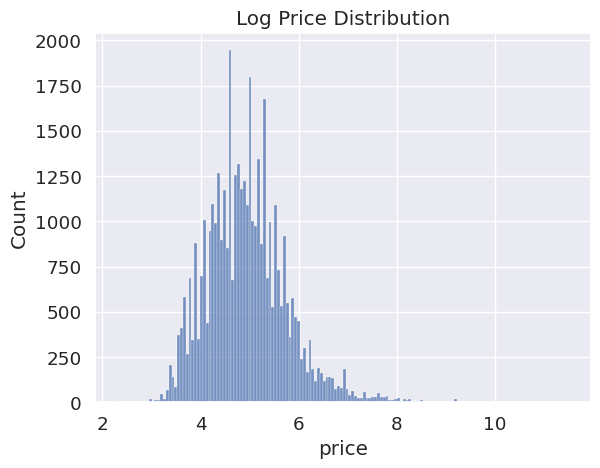

In [131]:
sns.histplot(log_prices).set(title = 'Log Price Distribution');

In [132]:
price_data['price'].mean(), max(price_data['price'])

(221.97828232971372, 98159.0)

In [133]:
ranges = []
counts = []
for i in range(0, 100000, 100):
  count = len(price_data['price'][(price_data['price'] >= i) & (price_data['price'] < (i+100))])
  
  if count > 0:
    ranges.append(str(i) + "-" + str(i+100))
    counts.append(count)
    print(i,"-",i+100, " count=", count)

0 - 100  count= 14591
100 - 200  count= 14547
200 - 300  count= 5984
300 - 400  count= 2726
400 - 500  count= 1081
500 - 600  count= 621
600 - 700  count= 405
700 - 800  count= 318
800 - 900  count= 184
900 - 1000  count= 227
1000 - 1100  count= 140
1100 - 1200  count= 78
1200 - 1300  count= 72
1300 - 1400  count= 31
1400 - 1500  count= 41
1500 - 1600  count= 50
1600 - 1700  count= 27
1700 - 1800  count= 26
1800 - 1900  count= 23
1900 - 2000  count= 35
2000 - 2100  count= 43
2100 - 2200  count= 16
2200 - 2300  count= 34
2300 - 2400  count= 16
2400 - 2500  count= 13
2500 - 2600  count= 28
2600 - 2700  count= 4
2700 - 2800  count= 8
2800 - 2900  count= 14
2900 - 3000  count= 6
3000 - 3100  count= 19
3100 - 3200  count= 3
3200 - 3300  count= 6
3300 - 3400  count= 3
3400 - 3500  count= 5
3500 - 3600  count= 10
3600 - 3700  count= 6
3700 - 3800  count= 7
3800 - 3900  count= 7
3900 - 4000  count= 5
4000 - 4100  count= 7
4100 - 4200  count= 5
4200 - 4300  count= 2
4300 - 4400  count= 2
4400 -

so predict log prices

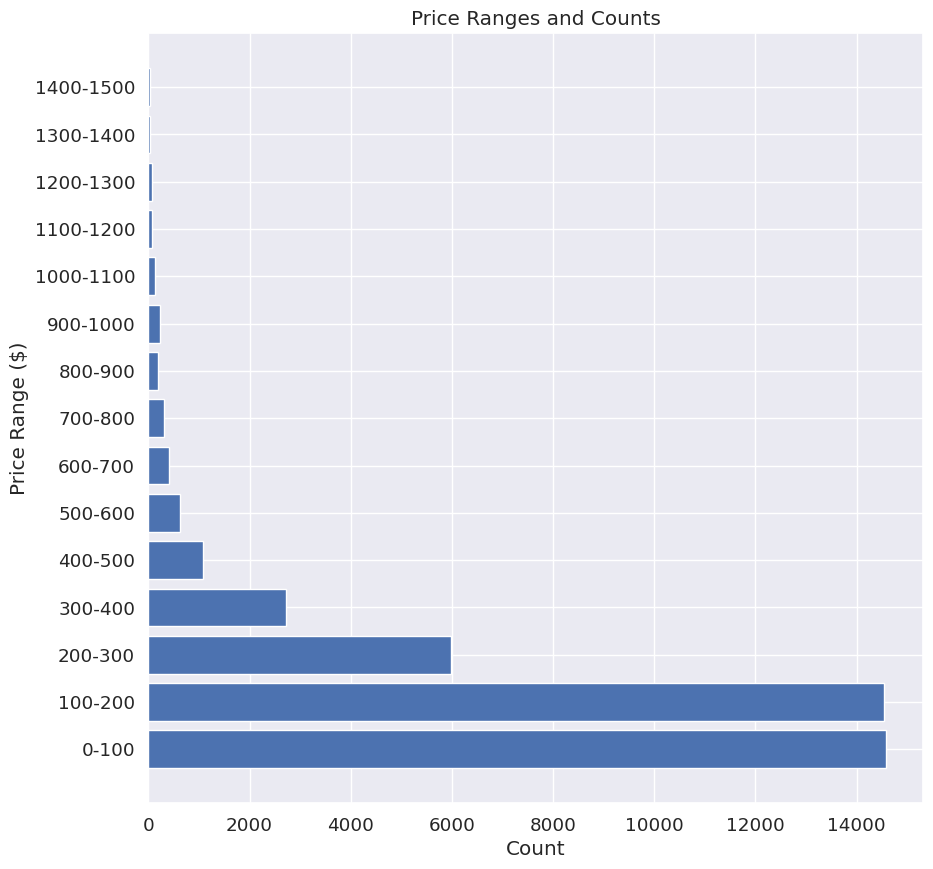

In [193]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(ranges[:15], counts[:15])

# customize the plot
ax.set_title('Price Ranges and Counts')
ax.set_xlabel('Count')
ax.set_ylabel('Price Range ($)')

plt.show()

### Remove Outliers

In [135]:
Q1 = price_data[numeric_columns].quantile(0.0)
Q3 = price_data[numeric_columns].quantile(0.90)
IQR = Q3 - Q1
filtered = price_data[~((price_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (price_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(price_data.shape)
display(filtered.shape)

(41533, 31)

(37898, 31)

### Fill Null Values

In [136]:
nulls = pd.DataFrame(filtered.isna().sum())
rows, cols = filtered.shape
for idx, row in nulls.iterrows():
  if row[0] >0:
    print(idx, row[0], "-", round((row[0]/rows)*100,2))

host_response_time 12948 - 34.17
host_response_rate 12948 - 34.17
host_acceptance_rate 11611 - 30.64
property_type 14 - 0.04
bedrooms 3536 - 9.33
beds 882 - 2.33
review_scores_rating 8132 - 21.46
review_scores_accuracy 8565 - 22.6
review_scores_cleanliness 8555 - 22.57
review_scores_checkin 8569 - 22.61
review_scores_communication 8560 - 22.59
review_scores_location 8572 - 22.62
review_scores_value 8572 - 22.62
reviews_per_month 8132 - 21.46
baths_cleaned 72 - 0.19


In [137]:
cols_fillna_most_freq=['beds','bedrooms','baths_cleaned','host_is_superhost',
                           'host_response_time']

cols_fillna_mean=['host_response_rate','host_acceptance_rate','review_scores_rating', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

cols_one_hot = ['host_response_time', 'room_type', 'neighbourhood_group_cleansed', 'property_type']

In [138]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

mean_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
most_freq_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [139]:
for col in cols_fillna_mean:
  # print('Skewness before filling nans ',col, round(price_data[col].skew(),3))
  filtered[col] = mean_imputer.fit_transform(filtered[col].values.reshape(-1,1))[:,0]
  # print('Skewness after filling nans ', round(price_data[col].skew(),3))
 
for col in cols_fillna_most_freq:
  # print('Skewness before filling nans ',col, round(price_data[col].skew(),3))
  filtered[col] = most_freq_imputer.fit_transform(filtered[col].values.reshape(-1,1))[:,0]
  # print('Skewness after filling nans ', round(price_data[col].skew(),3))


<ipython-input-139-c859d1aa61a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[col] = mean_imputer.fit_transform(filtered[col].values.reshape(-1,1))[:,0]
<ipython-input-139-c859d1aa61a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[col] = mean_imputer.fit_transform(filtered[col].values.reshape(-1,1))[:,0]
<ipython-input-139-c859d1aa61a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### Distribution after imputing

In [140]:
numeric_columns

['host_response_rate',
 'host_acceptance_rate',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'number_of_reviews',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [141]:
# from sklearn.preprocessing import StandardScaler

# cols_to_scale = ['host_response_rate',
#  'host_acceptance_rate',
#  'accommodates',
#  'bedrooms',
#  'beds',

#  'number_of_reviews',
#  'minimum_nights',
#  'maximum_nights',
#  'review_scores_rating',
#  'review_scores_accuracy',
#  'review_scores_cleanliness',
#  'review_scores_checkin',
#  'review_scores_communication',
#  'review_scores_location',
#  'review_scores_value']

# ds = filtered.loc[:, numeric_columns].copy()
# scaler = StandardScaler()
# scaler.fit(ds)
# scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns, index=ds.index)

# filtered.loc[:, numeric_columns] = scaled_ds

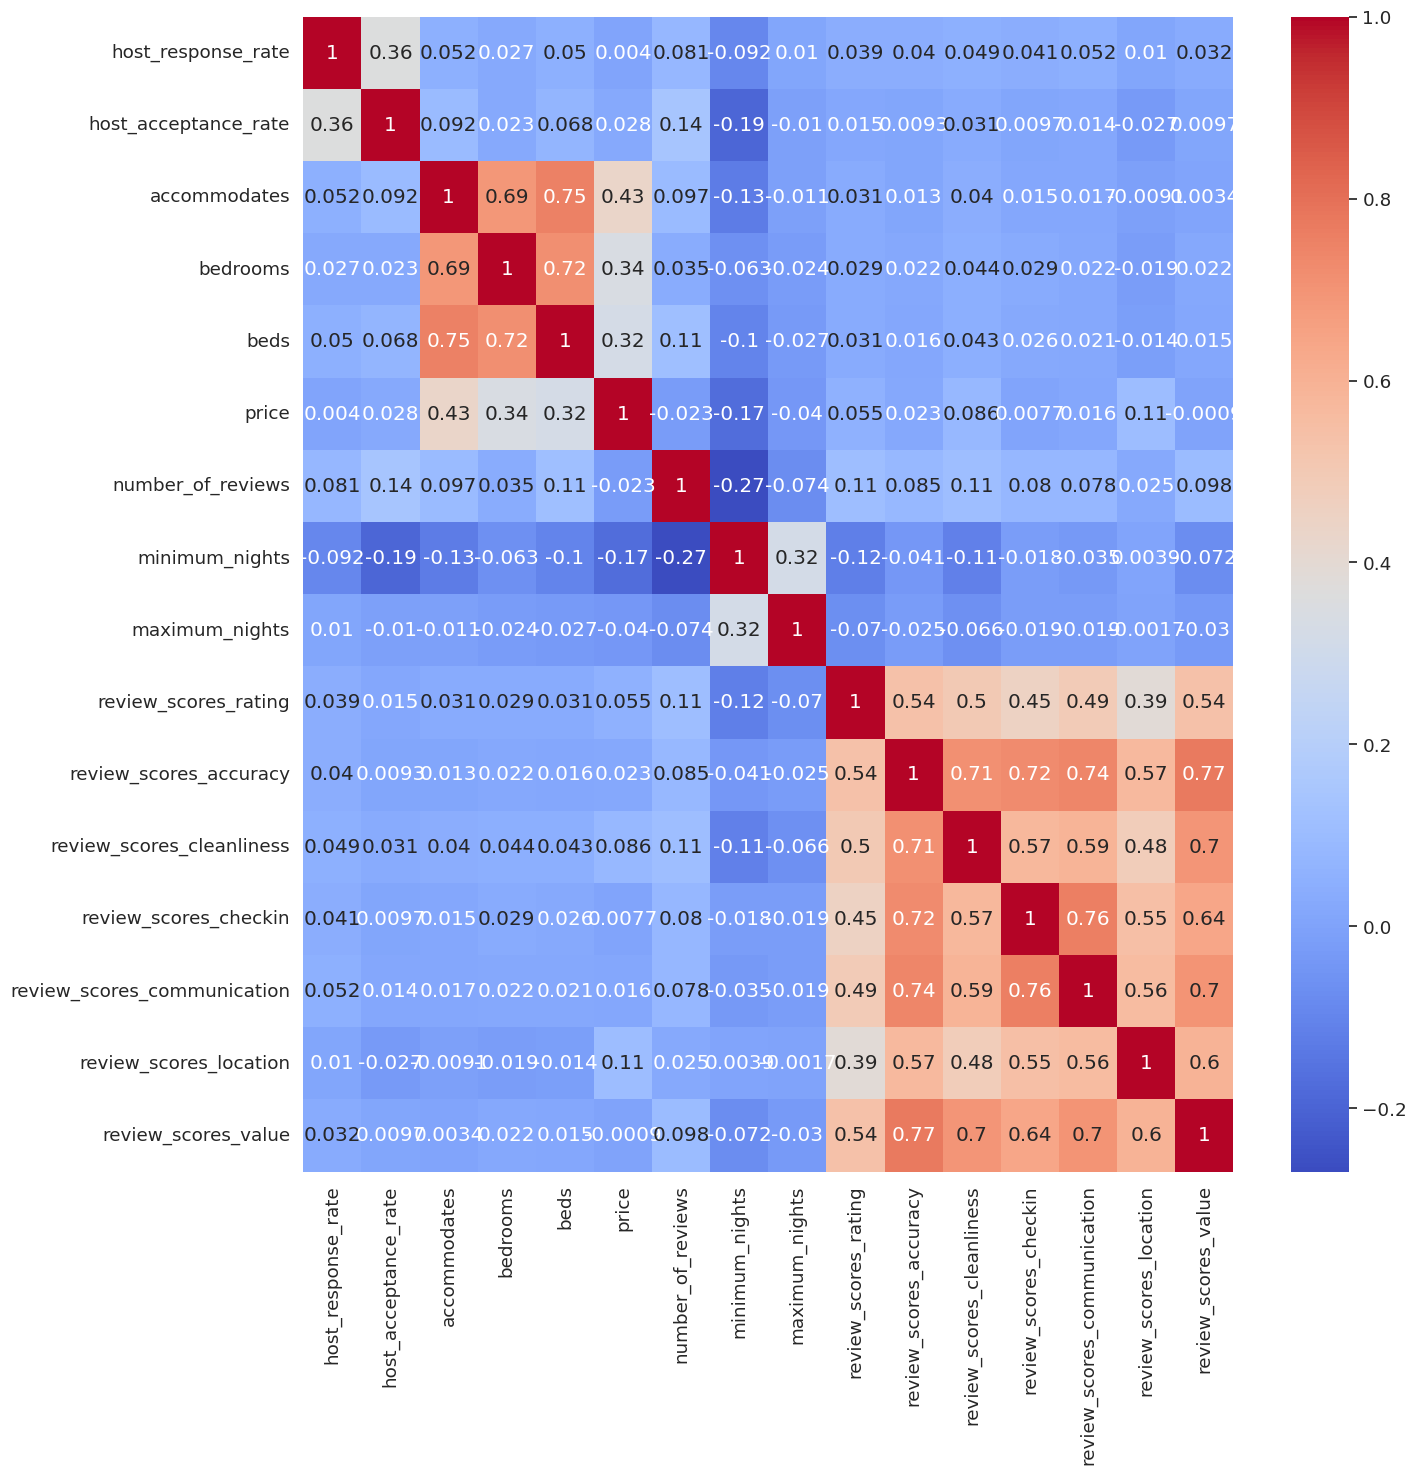

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(filtered[numeric_columns].corr(),annot=True, cmap='coolwarm', ax=ax)
plt.show()

Price has no strong corr with any (beds , baths - lil bit)

### One Hot Encoding

In [143]:
for col in cols_one_hot:
  one_hot_encoded = pd.get_dummies(filtered[col])
  filtered = pd.concat([filtered, one_hot_encoded], axis=1)
  filtered.drop(columns=[col], inplace = True)

filtered.head()

host_response_rate  host_acceptance_rate  host_is_superhost  \
0            0.720000               0.22000                0.0   
1            0.942264               0.83604                0.0   
2            0.942264               0.50000                0.0   
3            0.900000               0.82000                1.0   
4            1.000000               1.00000                0.0   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                   1.0                     1.0  40.75356  -73.98559   
1                   1.0                     1.0  40.80380  -73.96751   
2                   1.0                     1.0  40.66265  -73.99454   
3                   1.0                     1.0  40.68535  -73.95512   
4                   1.0                     1.0  40.70935  -73.95342   

   accommodates  bedrooms  beds  \
0             1       1.0   1.0   
1             1       1.0   1.0   
2             4       2.0   2.0   
3             2       1.0   1.0   
4             3       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Carbon monoxide alarm", "Stove", "Bathtub", ...  175.0              30   
1  ["Hair dryer", "Smoke alarm", "Carbon monoxide...   75.0               2   
2  ["HDTV with Disney+, HBO Max, standard cable, ...  275.0              21   
3  ["Heating", "Wifi", "Long term stays allowed",...   60.0              30   
4  ["Carbon monoxide alarm", "Shampoo", "Stove", ...   68.0              30   

   maximum_nights  has_availability  availability_30  number_of_reviews  \
0            1125               1.0               30                 49   
1              14               1.0                0                118   
2            1125               1.0                0                  3   
3             730               1.0               11                 50   
4             730               1.0               23                187   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.68                    4.73                       4.63   
1                  4.91                    4.83                       4.82   
2                  5.00                    5.00                       5.00   
3                  4.52                    4.22                       4.09   
4                  4.57                    4.59                       4.86   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.77                         4.80                    4.81   
1                   4.97                         4.95                    4.94   
2                   5.00                         5.00                    4.67   
3                   4.91                         4.91                    4.47   
4                   4.84                         4.80                    4.67   

   review_scores_value  instant_bookable  reviews_per_month  baths_cleaned  \
0                 4.40               0.0               0.31            1.0   
1                 4.92               0.0               0.73            1.0   
2                 5.00               0.0               0.03            1.5   
3                 4.52               0.0               0.30            1.0   
4                 4.56               0.0               1.13            1.0   

   a few days or more  within a day  within a few hours  within an hour  \
0                   0             1                   0               0   
1                   0             0                   0               1   
2                   0             0                   0               1   
3                   0             1                   0               0   
4                   0             0                   0               1   

   Entire home/apt  Hotel room  Private room  Shared room  Bronx  Brooklyn  \
0                1           0             0            0      0         0   
1   

In [144]:
def clean_str(s:str):
  for char in ['[',']','"',',','\\u']:
    s = s.replace(char, '')
  s = s.lower()
  return s

def long_term(s:str):
  if 'long' in s or 'term' in s or 'stays' in s:
    return 1
  else:
    return 0

def water(s:str):
  if 'hot' in s or 'water' in s:
    return 1
  else:
    return 0
  
def kitchen(s:str):
  if 'kitchen' in s or 'cooking' in s or 'oven' in s or 'stove' in s or 'kitchenette' in s:
    return 1
  else:
    return 0

def ac(s:str):
  if 'ac' in s or 'air conditioner' in s:
    return 1
  else:
    return 0

def tv(s:str):
  if 'tv' in s or 'hdtv' in s:
    return 1
  else:
    return 0

def security(s:str):
  if 'security' in s or 'alarm' in s or 'carbon monooxide' in s:
    return 1
  else:
    return 0

def park(s:str):
  if 'parking' in s:
    return 1
  else:
    return 0


filtered['amenities'] = filtered['amenities'].apply(clean_str)
filtered['long_term'] = filtered['amenities'].apply(long_term)
filtered['ac'] = filtered['amenities'].apply(ac)
filtered['tv'] = filtered['amenities'].apply(tv)
filtered['security'] = filtered['amenities'].apply(security)
filtered['park'] = filtered['amenities'].apply(park)
filtered['kitchen'] = filtered['amenities'].apply(kitchen)
filtered['water'] = filtered['amenities'].apply(water)

In [145]:
joined = " ".join(filtered['amenities'])

(-0.5, 399.5, 199.5, -0.5)

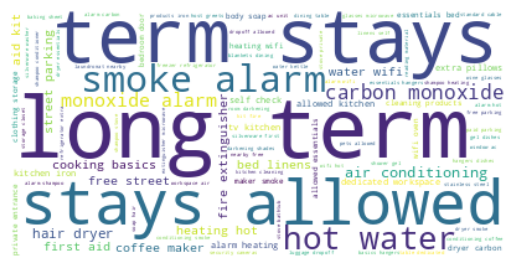

In [146]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color='white').generate(joined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [147]:
filtered.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'baths_cleaned', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Apartment',
       'Hotel', 'House/Villa', 'Other', 'long_term', 'ac', 'tv', 'security',
       'park', 'kitchen', 'water'],
      dtype='object')

In [148]:
filtered['price'] = filtered['price'].apply(np.log)

In [149]:
filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
filtered.dropna(inplace=True)

In [150]:
filtered.shape

(37869, 51)

In [151]:
filtered.drop(columns=['amenities'], inplace=True)

In [152]:
cols = list(filtered.columns.difference(numeric_columns))

cols.append('price')

In [153]:
filtered[cols].corr()['price']

Apartment                -0.016771
Bronx                    -0.103416
Brooklyn                 -0.134104
Entire home/apt           0.557197
Hotel                     0.161204
Hotel room                0.074336
House/Villa              -0.055171
Manhattan                 0.330056
Other                    -0.025300
Private room             -0.543530
Queens                   -0.200674
Shared room              -0.107902
Staten Island            -0.037490
a few days or more        0.002010
ac                        0.169421
availability_30           0.148870
baths_cleaned             0.137301
has_availability          0.150566
host_has_profile_pic     -0.009379
host_identity_verified    0.045224
host_is_superhost         0.071731
instant_bookable          0.091612
kitchen                  -0.051396
latitude                  0.032850
long_term                -0.031829
longitude                -0.289030
park                      0.014242
reviews_per_month         0.095230
security            

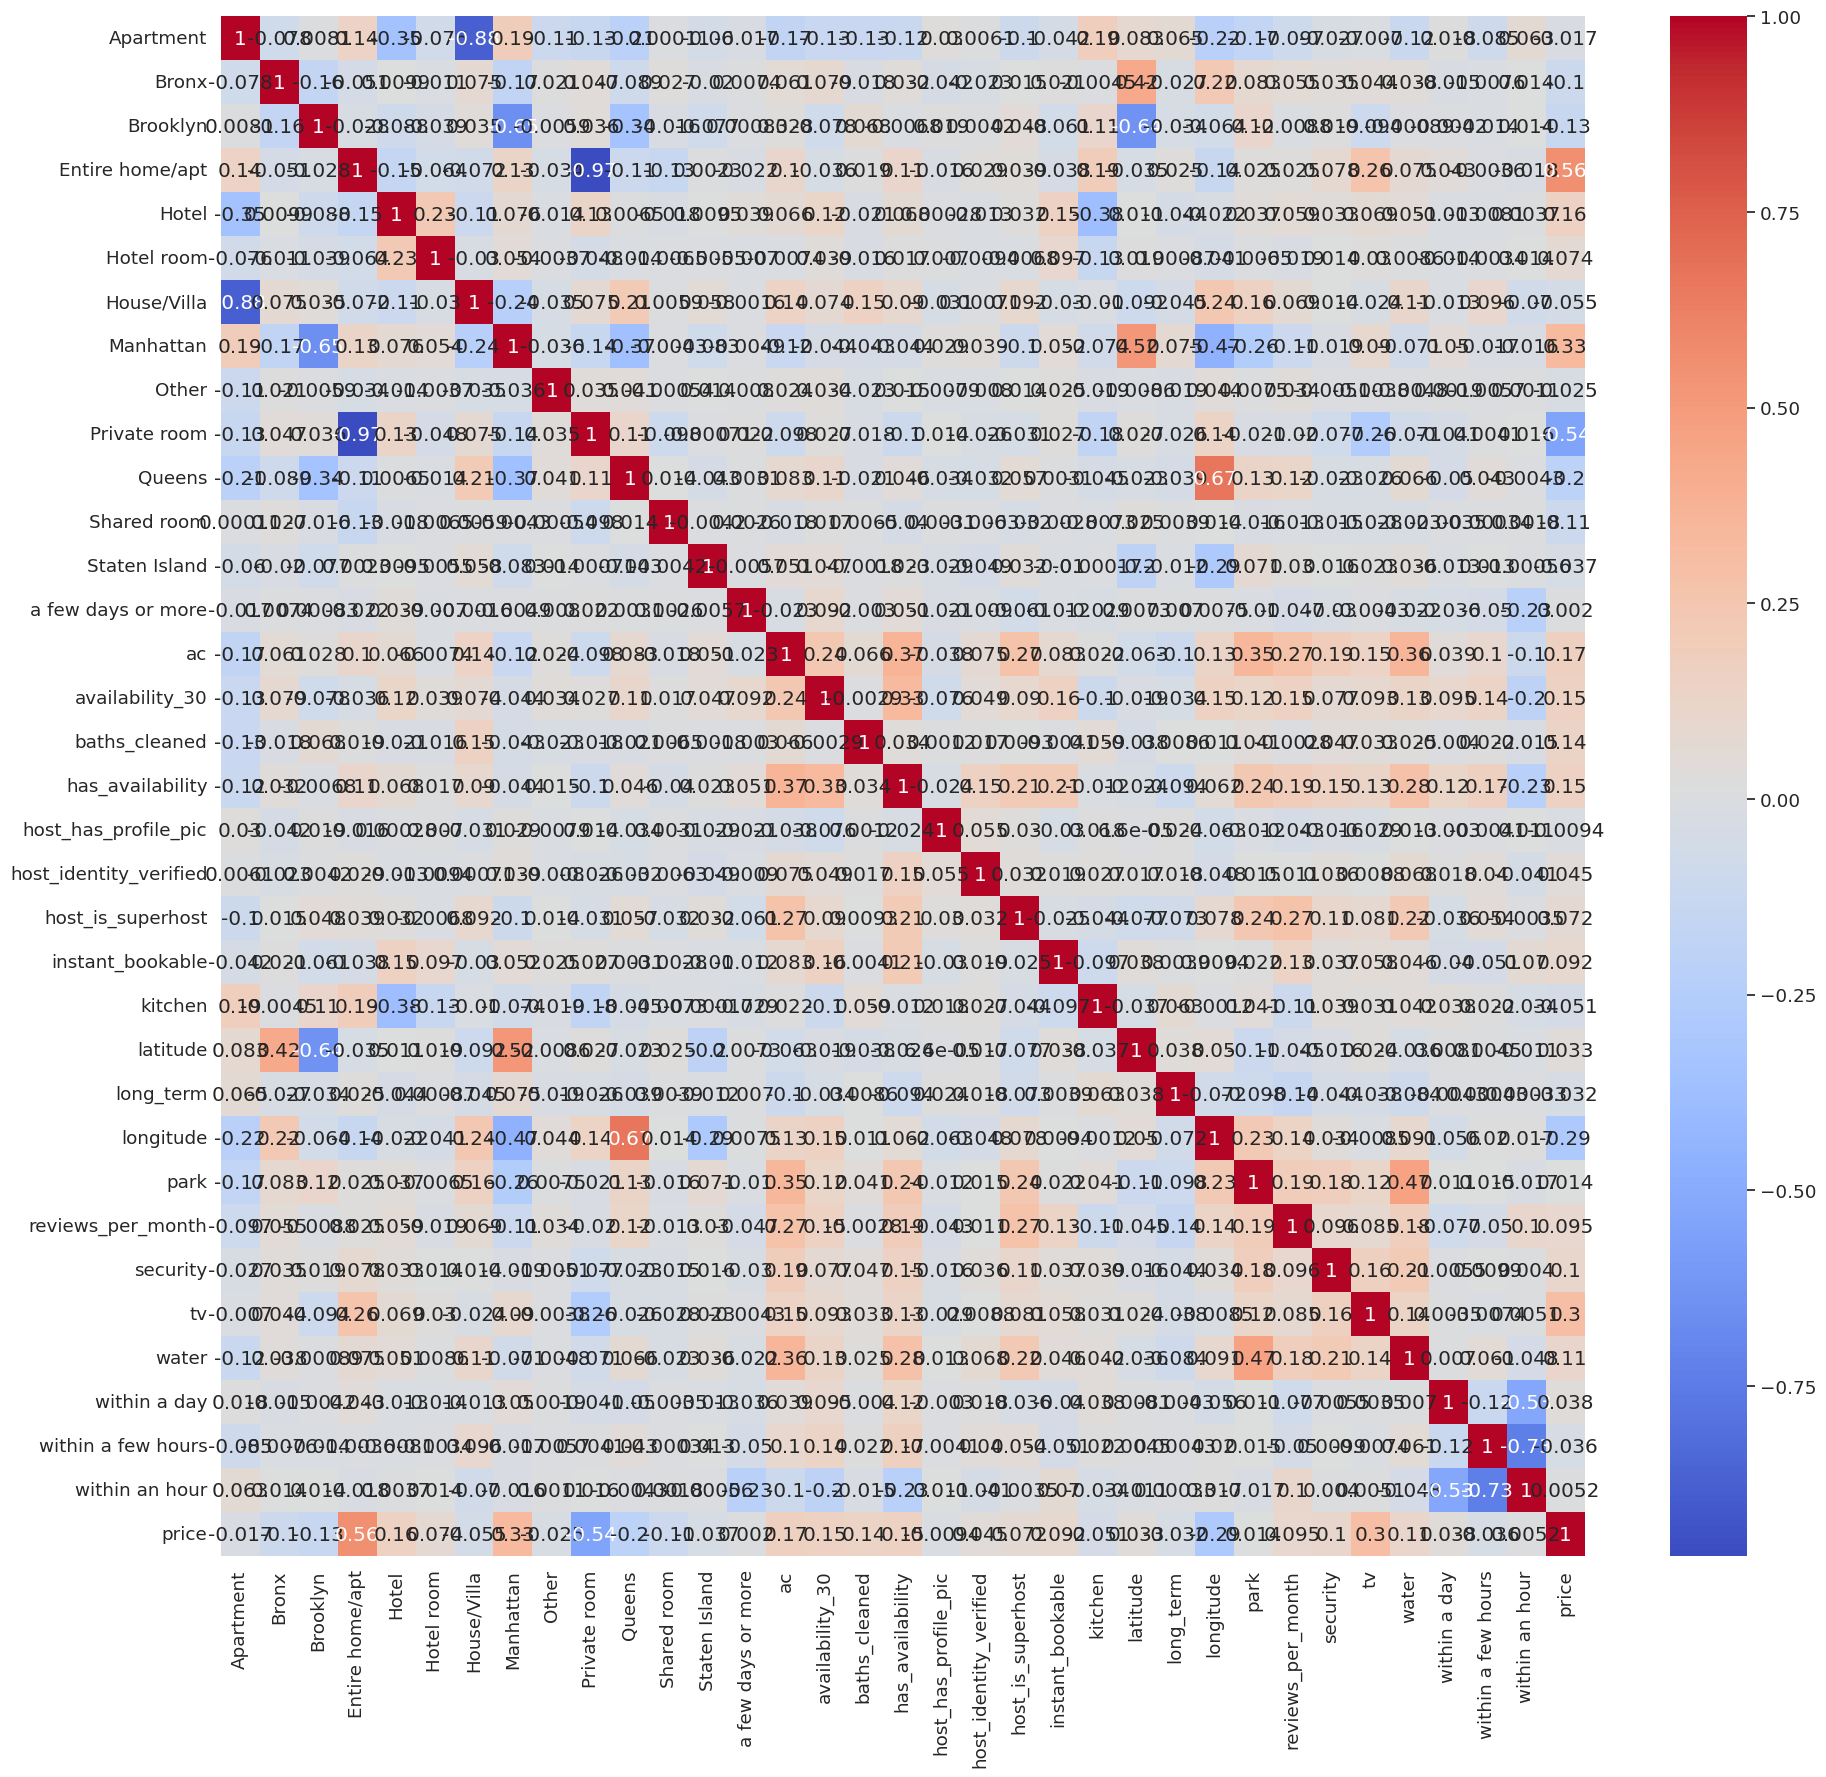

In [154]:
fig, ax = plt.subplots(figsize=(22, 20))
sns.heatmap(filtered[cols].corr(),annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [155]:
# feats = ['latitude','longitude', 'accommodates', 'bedrooms', 'beds',
#        'minimum_nights', 'maximum_nights', 'has_availability',
#        'availability_30', 'number_of_reviews', 'review_scores_rating',
#        'review_scores_accuracy', 'review_scores_cleanliness',
#        'review_scores_location', 'instant_bookable', 'baths_cleaned', 
#        'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Bronx',
#        'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Apartment',
#        'Hotel', 'House/Villa', 'Other', 'long_term', 'ac', 'tv', 'security', 'kitchen', 'water']

# pred = 'price'

## Modeling and Feature Engineering

Decision trees / Feature importance plots


Linear Regression - Baseline

Ensemble


Need:

RMSE - 0.2 to 0.5

R^2 - more than 0.6

consider Lasso/sparse regression

### Linear Regression

In [156]:
# # from sklearn.feature_extraction.text import TfidfVectorizer

# feats = filtered.columns.difference(['price','amenities'])
# X = filtered.loc[:, feats].values
# # X_num = filtered.loc[:, feats].values

# # tfidf = TfidfVectorizer()
# # X_text = tfidf.fit_transform(filtered['amenities'])

# # X = np.hstack((X_text.toarray(), X_num))

# y = filtered.loc[:, 'price']

In [157]:
from sklearn.model_selection import train_test_split

feats = filtered.columns.difference(['price','amenities'])
X = filtered.loc[:, feats].values
y = filtered.loc[:, 'price']


# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# evaluate the model on the test data
score = regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")


from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(regressor, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.629
RMSE: 0.427
Cross-validated R^2 score: 0.629
Cross-validated RMSE score: 0.426


In [159]:
feats

Index(['Apartment', 'Bronx', 'Brooklyn', 'Entire home/apt', 'Hotel',
       'Hotel room', 'House/Villa', 'Manhattan', 'Other', 'Private room',
       'Queens', 'Shared room', 'Staten Island', 'a few days or more', 'ac',
       'accommodates', 'availability_30', 'baths_cleaned', 'bedrooms', 'beds',
       'has_availability', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_response_rate',
       'instant_bookable', 'kitchen', 'latitude', 'long_term', 'longitude',
       'maximum_nights', 'minimum_nights', 'number_of_reviews', 'park',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month', 'security', 'tv', 'water', 'within a day',
       'within a few hours', 'within an hour'],
      dtype='object')

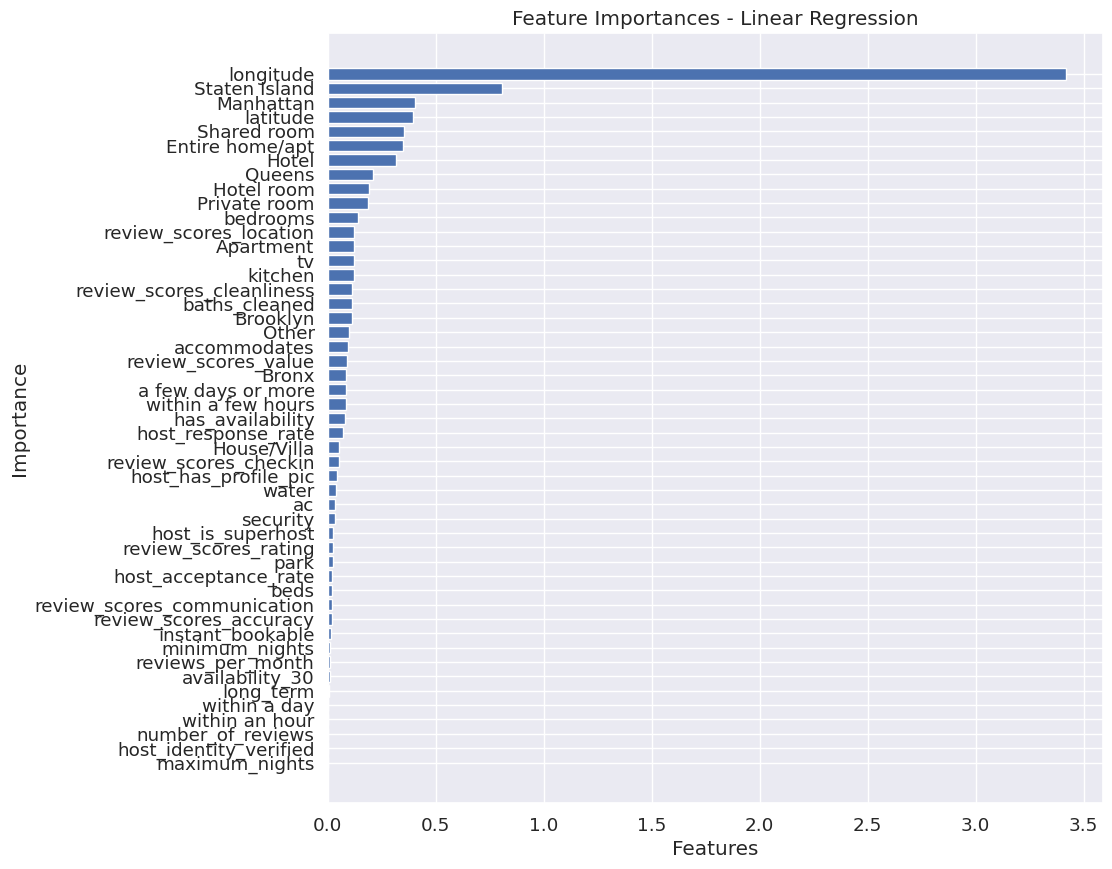

In [160]:
feat_imp =  {}
coefs = regressor.coef_
for i in range(len(coefs)):
  feat_imp[feats[i]] = abs(coefs[i])

feat_imp = dict(sorted(feat_imp.items(), key=lambda x: x[1]))

plt.figure(figsize=(10,10))
plt.barh( list(feat_imp.keys()), list(feat_imp.values()))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Linear Regression')
plt.show()

In [161]:
#@title
from sklearn.model_selection import train_test_split

feats = ['minimum_nights', 'instant_bookable', 'review_scores_accuracy', 'review_scores_communication', 
         'beds', 'host_acceptance_rate', 'park', 'review_scores_rating', 'host_is_superhost',
         'security', 'ac', 'water', 'host_has_profile_pic', 'review_scores_checkin', 
         'House/Villa', 'host_response_rate', 'has_availability', 'within a few hours', 
         'a few days or more', 'Bronx', 'review_scores_value', 'accommodates', 'Other', 
         'Brooklyn', 'baths_cleaned', 'review_scores_cleanliness', 'kitchen', 'tv', 'Apartment', 
         'review_scores_location', 'bedrooms', 'Private room', 'Hotel room', 'Queens', 'Hotel', 
         'Entire home/apt', 'Shared room', 'latitude', 'Manhattan', 'Staten Island', 'longitude',
         ]
X = filtered.loc[:, feats].values
y = filtered.loc[:, 'price']


# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# evaluate the model on the test data
score = regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.608
RMSE: 0.439


In [162]:
#@title
from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(regressor, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

Cross-validated R^2 score: 0.609
Cross-validated RMSE score: 0.438


In [163]:
scores

{'fit_time': array([0.11624885, 0.08679318, 0.14417911, 0.15832543, 0.13547993]),
 'score_time': array([0.00263429, 0.00251222, 0.00850224, 0.0070076 , 0.00247121]),
 'test_r2': array([0.61322945, 0.61777574, 0.59677609, 0.60653518, 0.61091711]),
 'test_rmse': array([0.43700965, 0.43132707, 0.43870607, 0.44053161, 0.44100459])}

In [164]:
# from statsmodels.api import OLS
# OLS(y, X).fit().summary()

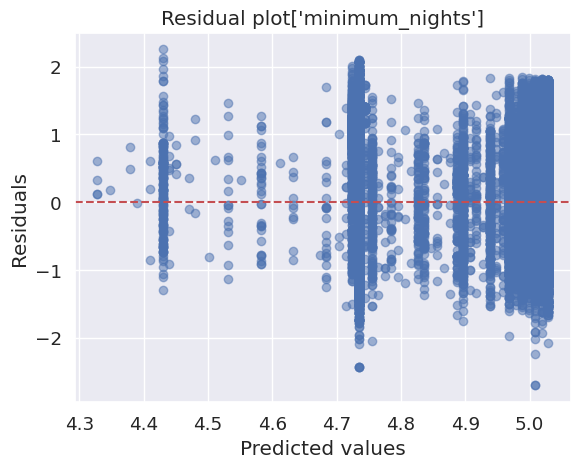

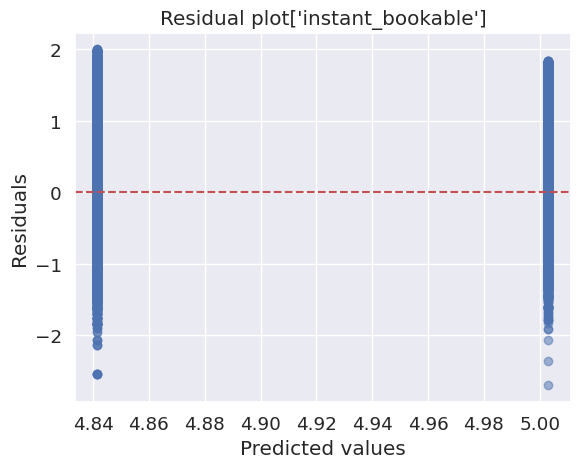

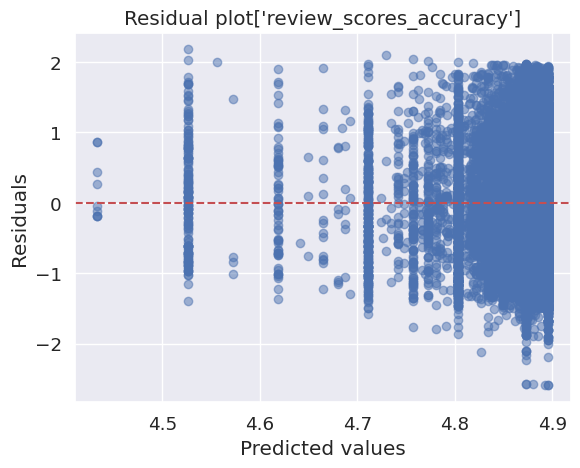

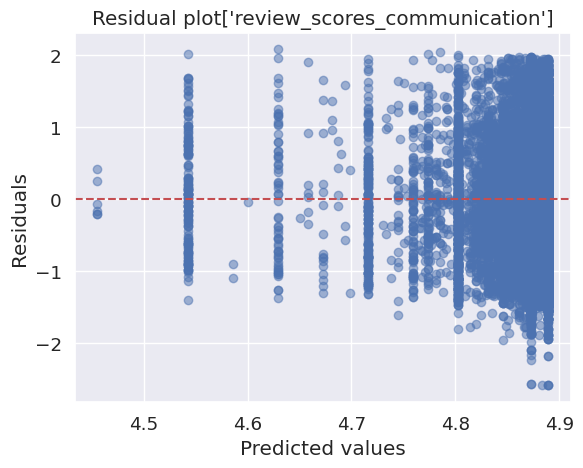

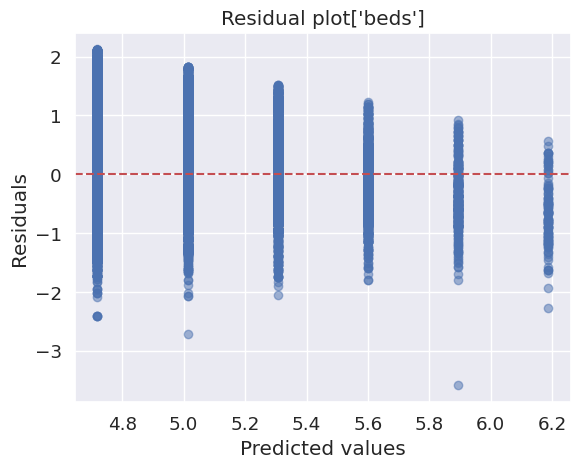

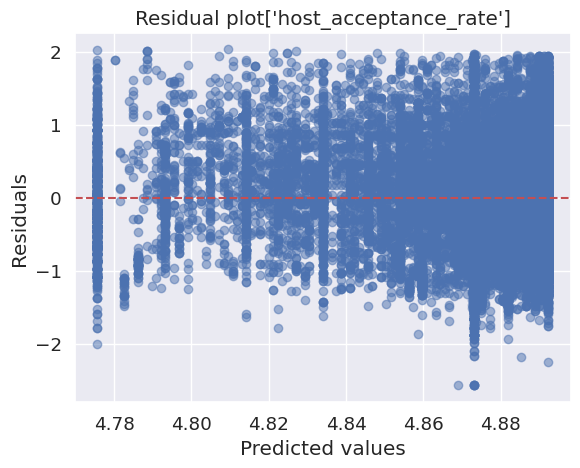

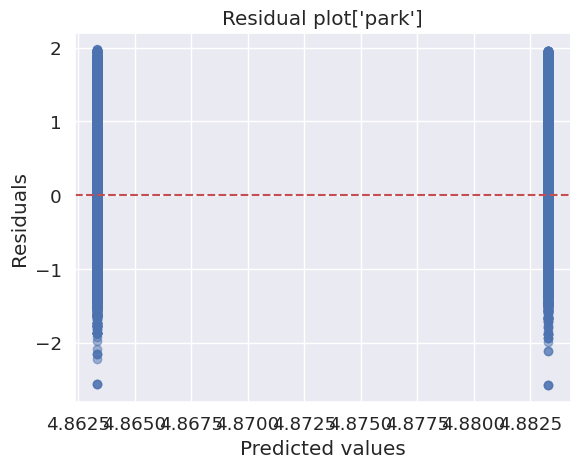

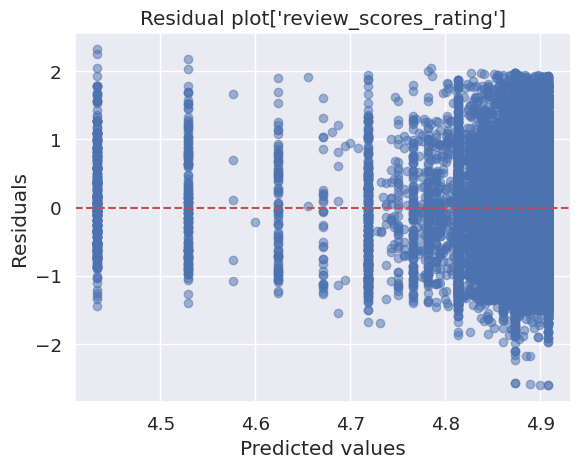

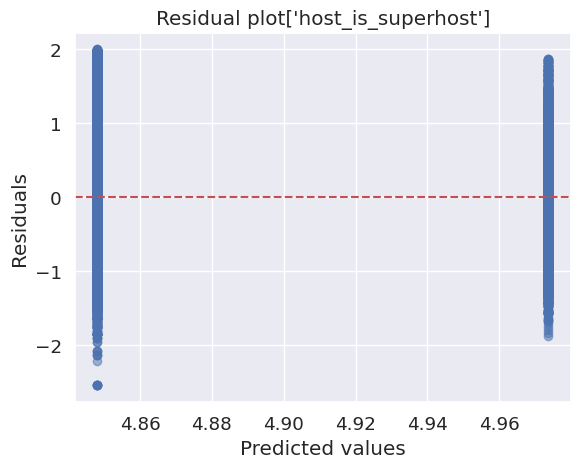

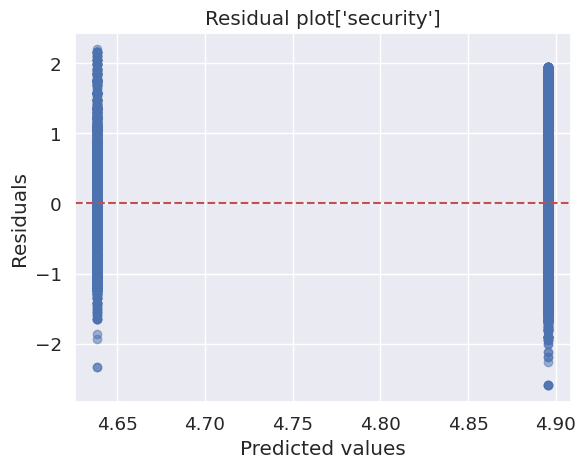

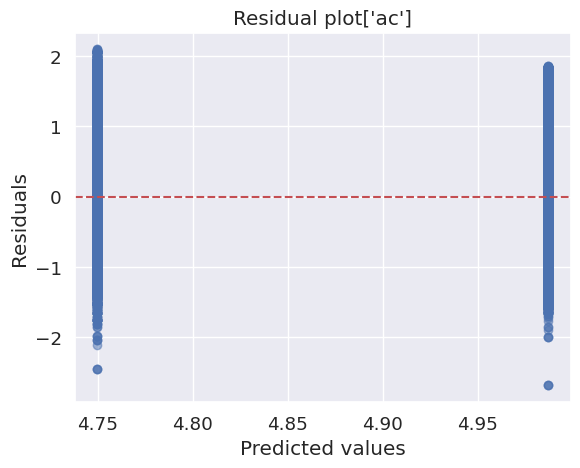

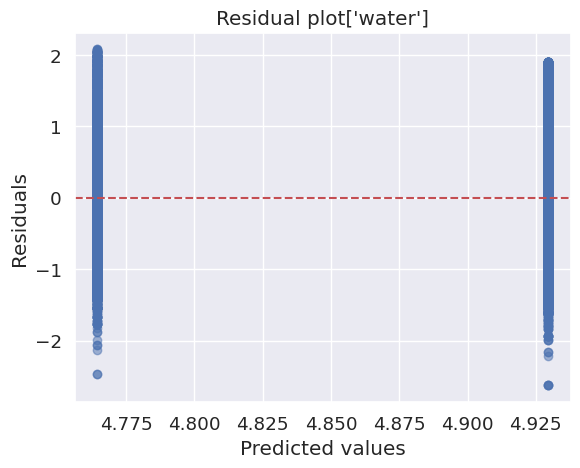

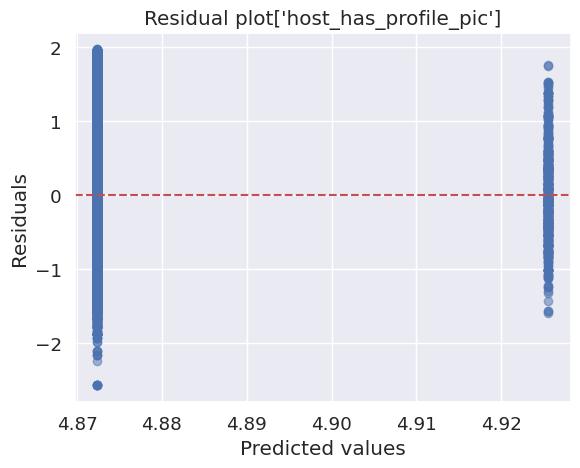

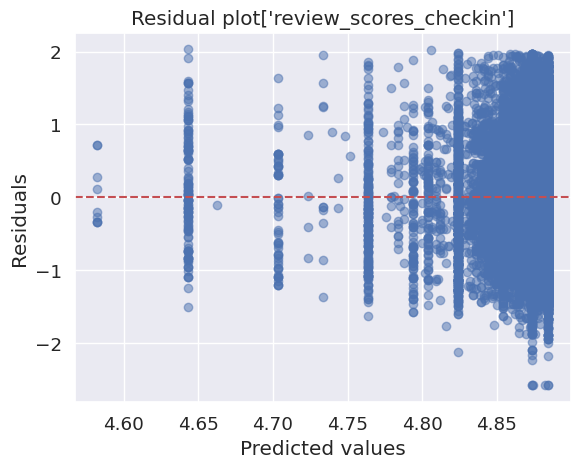

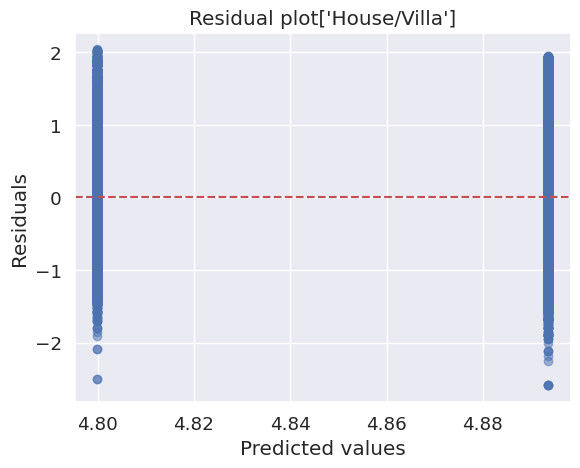

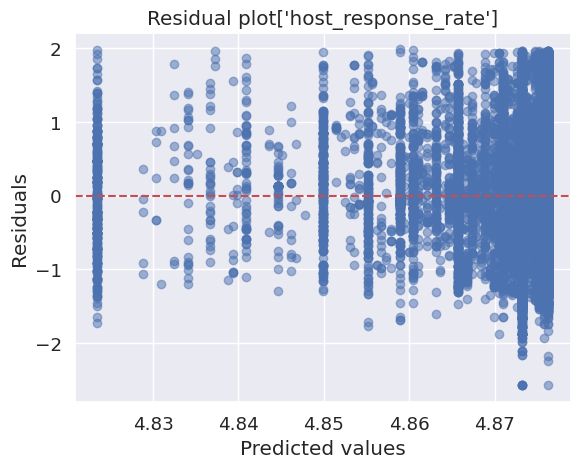

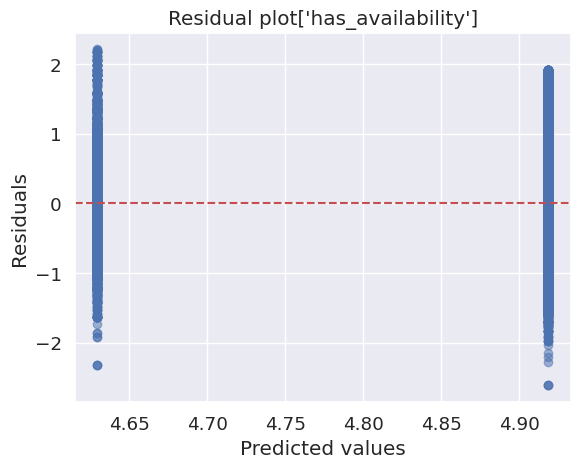

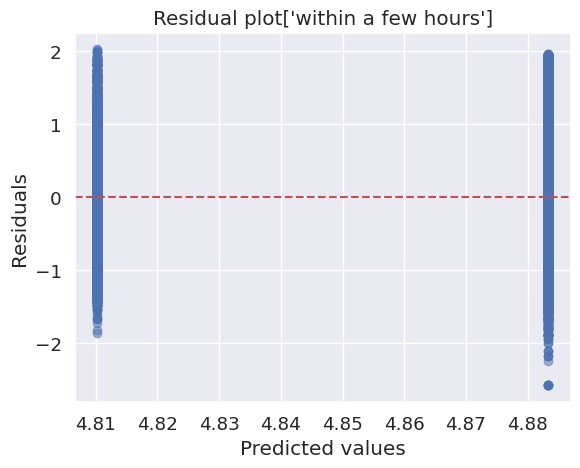

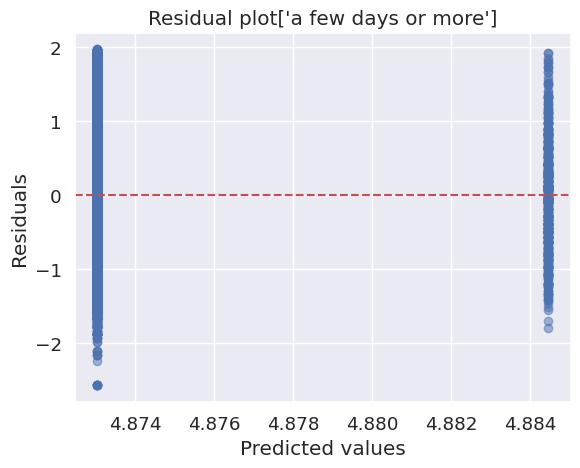

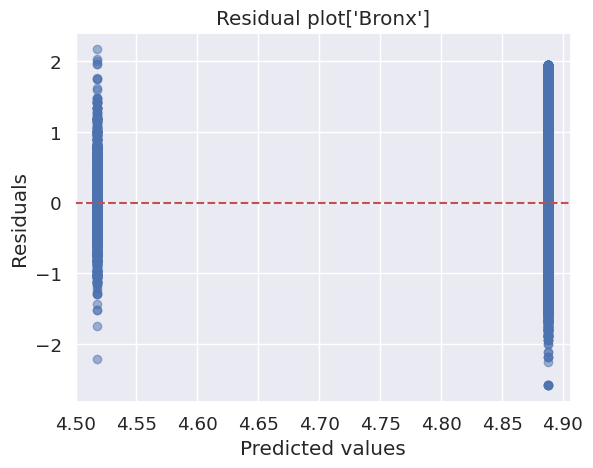

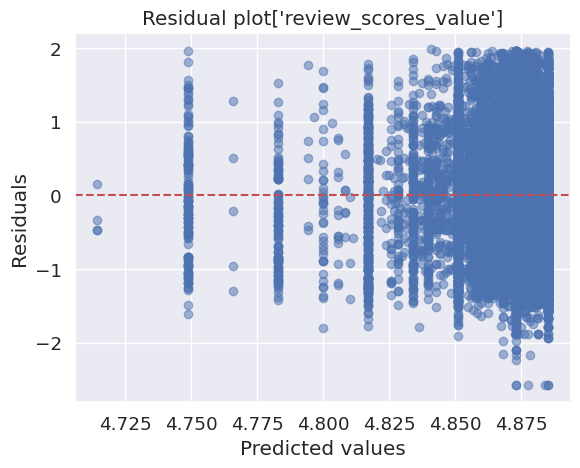

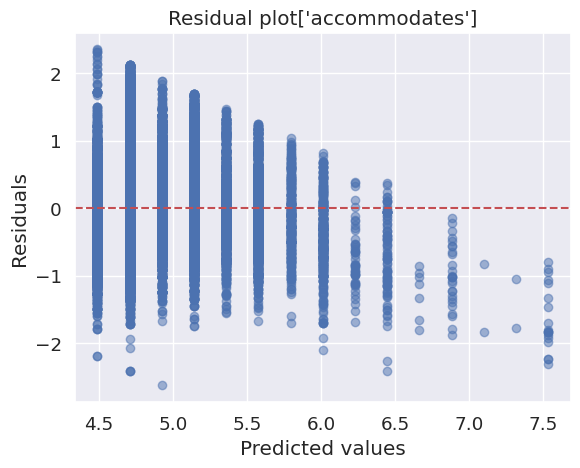

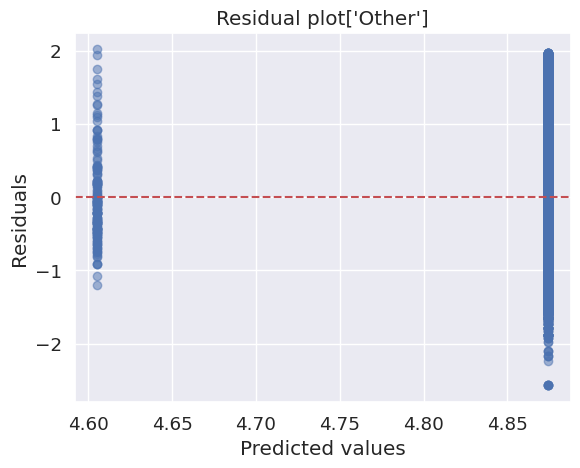

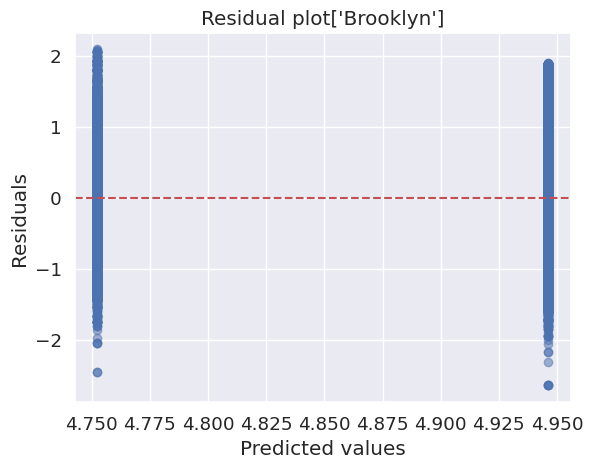

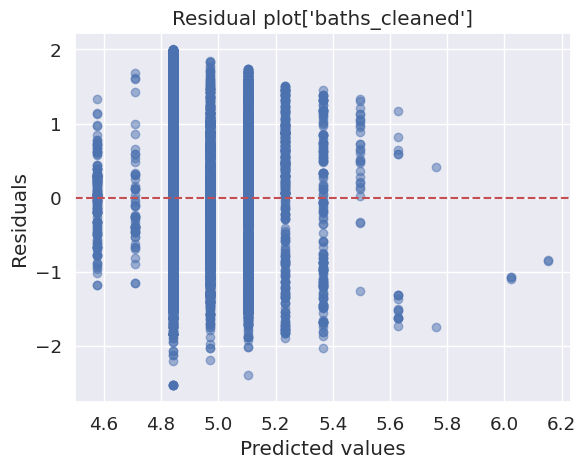

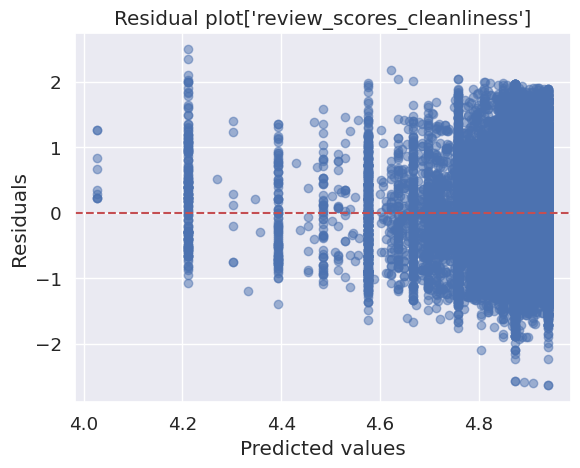

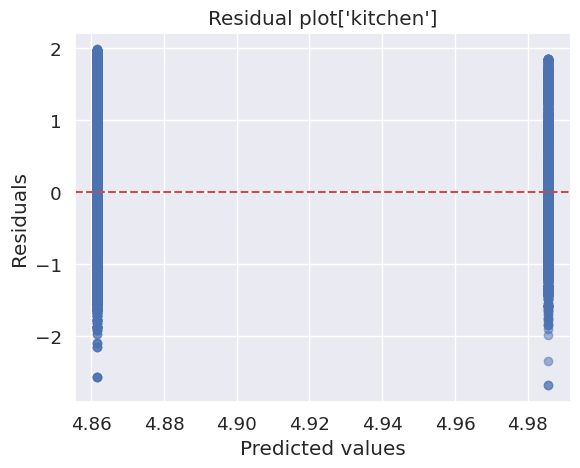

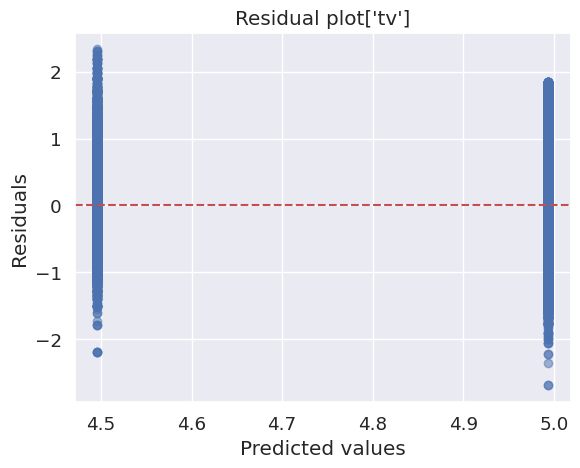

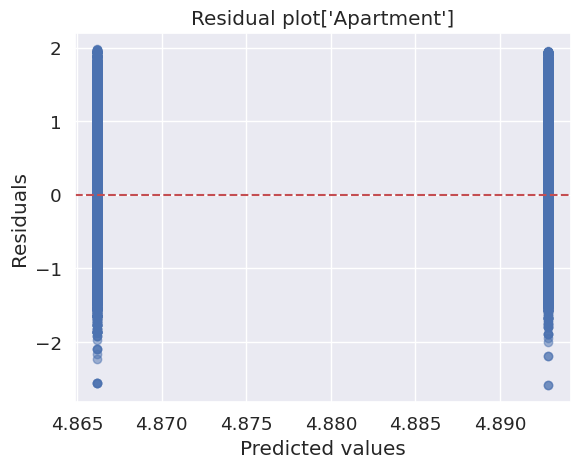

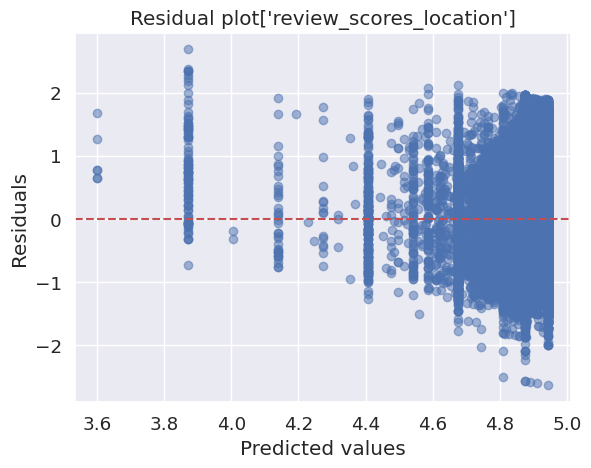

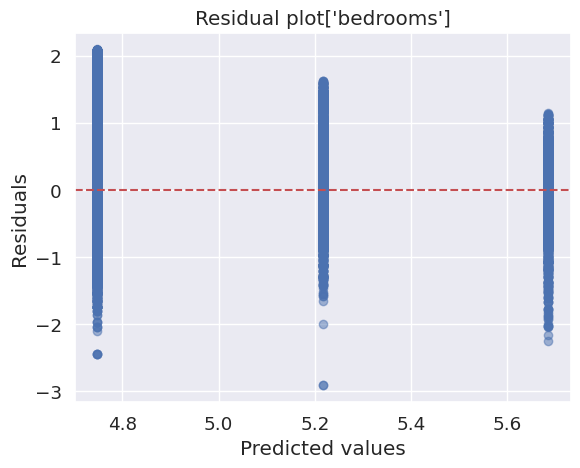

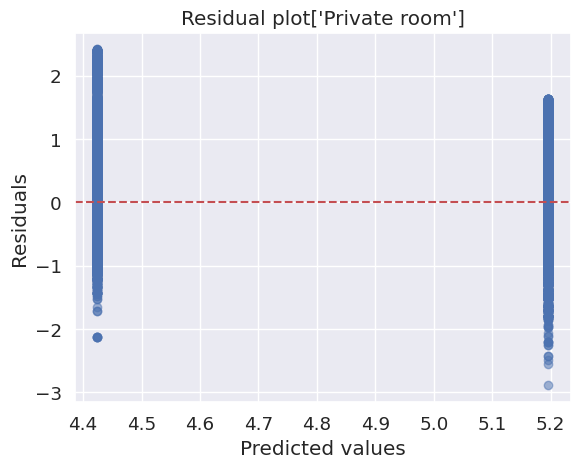

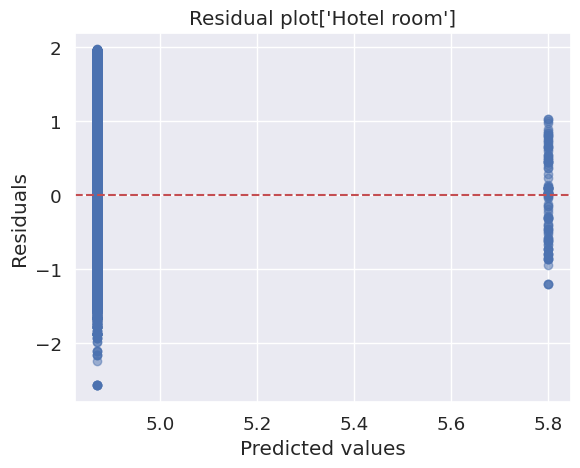

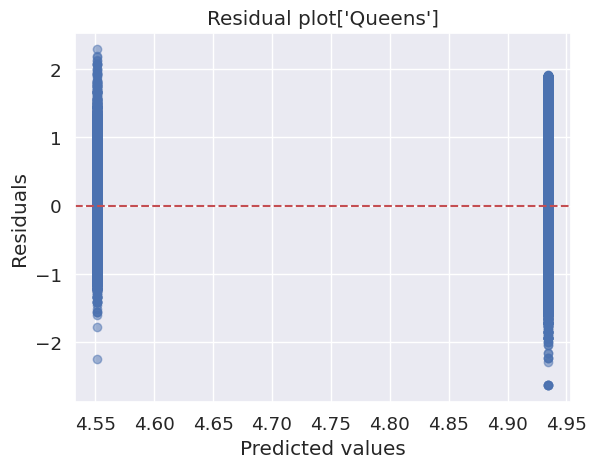

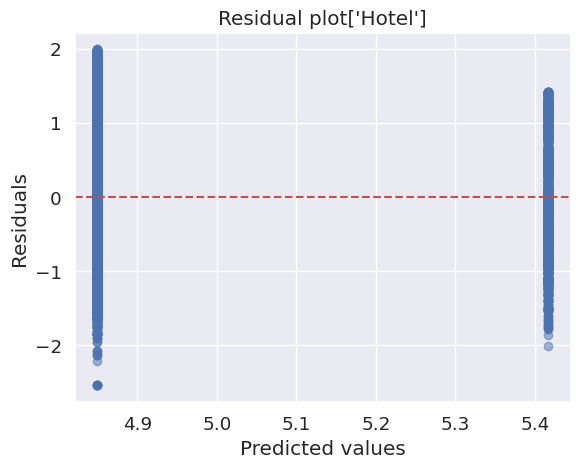

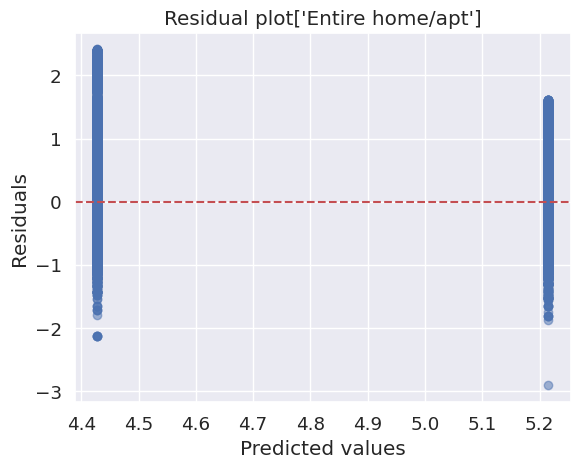

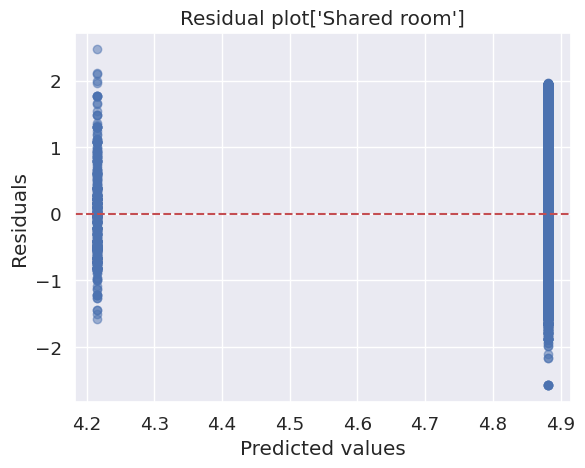

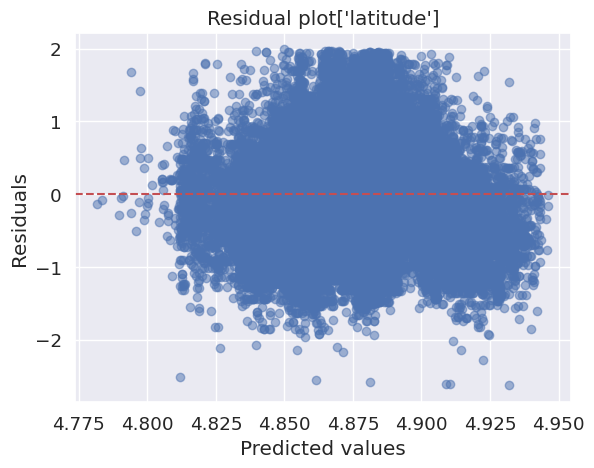

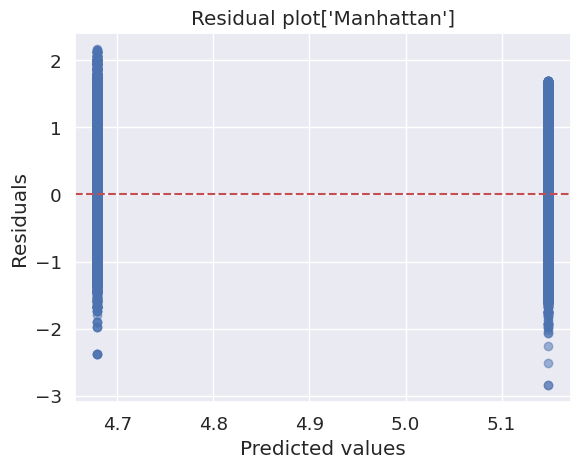

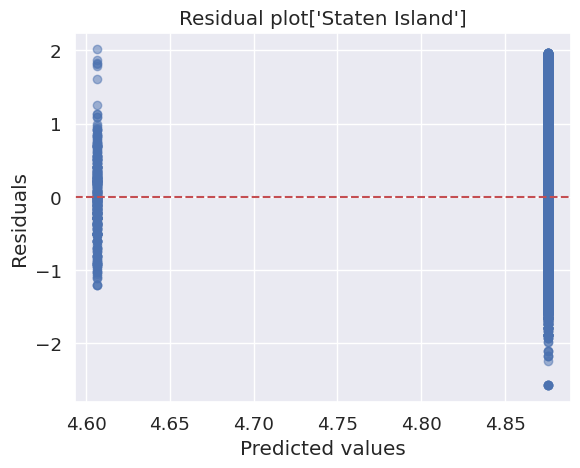

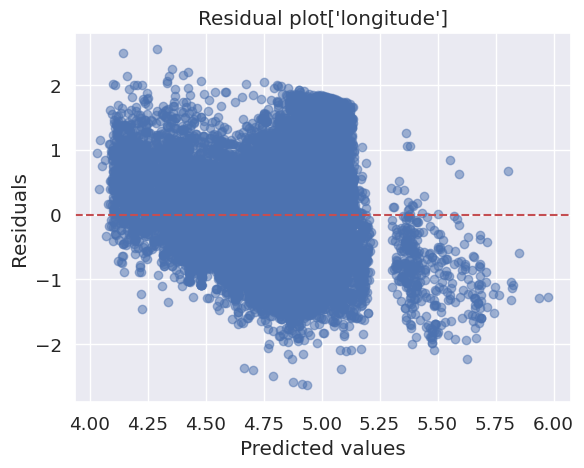

In [165]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def residual_plot(x_feats):

  X = filtered.loc[:,x_feats].values
  # Fit the linear regression model
  X = sm.add_constant(X) 
  model = sm.OLS(y, X).fit()

  # Predict the target variable
  y_pred = model.predict(X)

  # Calculate the residuals
  residuals = y - y_pred

  fig, ax = plt.subplots()
  ax.scatter(y_pred, residuals, alpha=0.5)
  ax.axhline(y=0, color='r', linestyle='--')
  ax.set_xlabel('Predicted values')
  ax.set_ylabel('Residuals')
  ax.set_title('Residual plot'+str(x_feats))
  
  return fig


# Call residual_plot for each list of x_feats
for x in feats:
    fig = residual_plot([x])
    plt.show() 

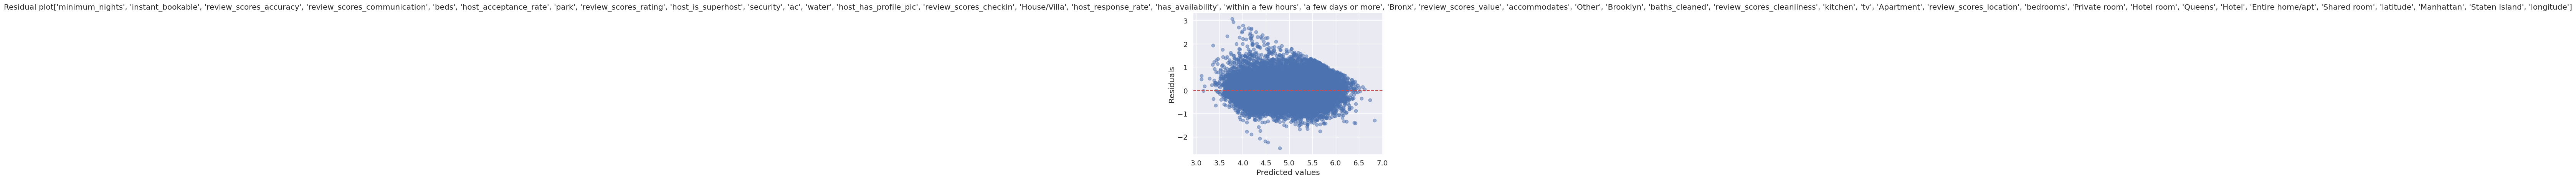

In [166]:
fig = residual_plot(feats)
plt.show()

## Ridge & Lasso Regression

In [167]:
#@title
from sklearn.model_selection import train_test_split

feats = filtered.columns.difference(['price','amenities'])
X = filtered.loc[:, feats].values
y = filtered.loc[:, 'price']
# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



ridge_regressor = Ridge()
# fit the model to the training data
ridge_regressor.fit(X_train, y_train)

score = ridge_regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = ridge_regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")



from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(ridge_regressor, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.629
RMSE: 0.427
Cross-validated R^2 score: 0.629
Cross-validated RMSE score: 0.426


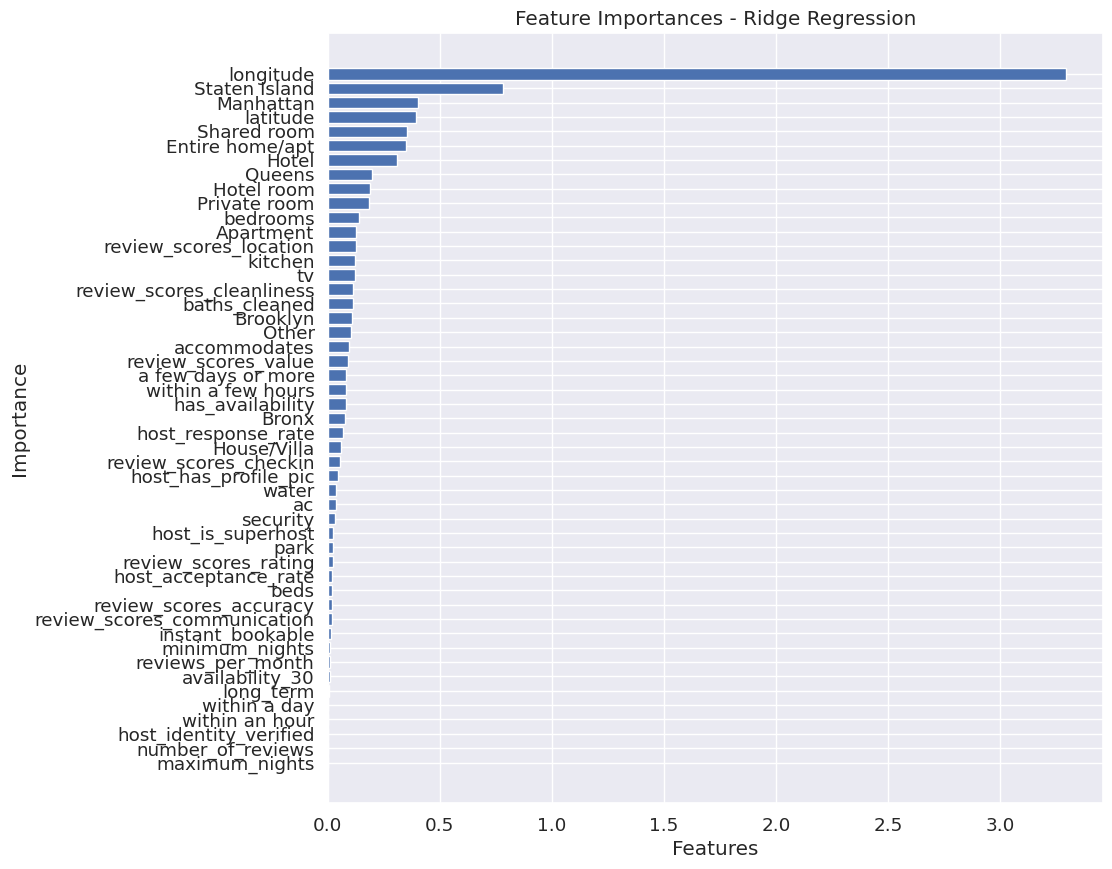

In [168]:
#@title
feat_imp =  {}
coefs = ridge_regressor.coef_
for i in range(len(coefs)):
  feat_imp[feats[i]] = abs(coefs[i])

feat_imp = dict(sorted(feat_imp.items(), key=lambda x: x[1]))

plt.figure(figsize=(10,10))
plt.barh( list(feat_imp.keys()), list(feat_imp.values()))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Ridge Regression')
plt.show()

In [169]:
#@title
from sklearn.model_selection import train_test_split

feats = ['minimum_nights', 'instant_bookable', 'review_scores_accuracy', 'review_scores_communication', 
         'beds', 'host_acceptance_rate', 'park', 'review_scores_rating', 'host_is_superhost',
         'security', 'ac', 'water', 'host_has_profile_pic', 'review_scores_checkin', 
         'House/Villa', 'host_response_rate', 'has_availability', 'within a few hours', 
         'a few days or more', 'Bronx', 'review_scores_value', 'accommodates', 'Other', 
         'Brooklyn', 'baths_cleaned', 'review_scores_cleanliness', 'kitchen', 'tv', 'Apartment', 
         'review_scores_location', 'bedrooms', 'Private room', 'Hotel room', 'Queens', 'Hotel', 
         'Entire home/apt', 'Shared room', 'latitude', 'Manhattan', 'Staten Island', 'longitude',
         ]
X = filtered.loc[:, feats].values
y = filtered.loc[:, 'price']
# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



ridge_regressor = Ridge()
# fit the model to the training data
ridge_regressor.fit(X_train, y_train)

score = ridge_regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = ridge_regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")



from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(ridge_regressor, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.608
RMSE: 0.439
Cross-validated R^2 score: 0.609
Cross-validated RMSE score: 0.438


## Lasso Regression

In [170]:
x_feats = filtered.columns.difference(['price','amenities'])
X = filtered.loc[:, x_feats].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso()

# fit the model to the training data
lasso.fit(X_train, y_train)

score = lasso.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = lasso.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")



from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(lasso, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.029
RMSE: 0.691
Cross-validated R^2 score: 0.030
Cross-validated RMSE score: 0.690


In [171]:
alphas = np.logspace(-4, 2, 50)
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha


best_lasso = Lasso(alpha=best_alpha)

best_lasso.fit(X_train, y_train)
score = best_lasso.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

y_pred = best_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")



k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(best_lasso, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.629
RMSE: 0.427
Cross-validated R^2 score: 0.629
Cross-validated RMSE score: 0.426


In [172]:
best_alpha

0.0001

In [173]:
for name, coef in zip(x_feats, best_lasso.coef_):
    if coef > 0:
      print(f"{name}: {coef:.3f}")

Entire home/apt: 0.534
Hotel: 0.368
Hotel room: 0.344
Manhattan: 0.288
Queens: 0.086
a few days or more: 0.042
ac: 0.034
accommodates: 0.092
availability_30: 0.010
baths_cleaned: 0.110
bedrooms: 0.138
host_has_profile_pic: 0.037
host_identity_verified: 0.001
host_is_superhost: 0.024
host_response_rate: 0.026
instant_bookable: 0.013
maximum_nights: 0.000
review_scores_cleanliness: 0.110
review_scores_communication: 0.014
review_scores_location: 0.123
review_scores_rating: 0.023
security: 0.030
tv: 0.122
water: 0.036
within an hour: 0.002


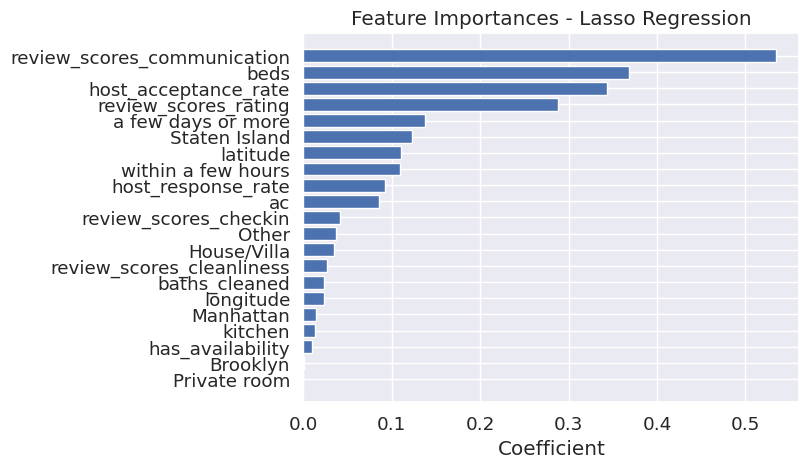

In [174]:
feat_imp = {}
for name, coef in zip(feats, best_lasso.coef_):
    if coef > 0:
        feat_imp[name] = coef

feat_imp = dict(sorted(feat_imp.items(), key=lambda item: item[1]))

plt.barh(list(feat_imp.keys()), list(feat_imp.values()))
plt.title('Feature Importances - Lasso Regression')
plt.xlabel('Coefficient')
plt.show()

In [175]:
filtered.columns.difference(list(feat_imp.keys()))

Index(['Apartment', 'Bronx', 'Entire home/apt', 'Hotel', 'Hotel room',
       'Queens', 'Shared room', 'accommodates', 'availability_30', 'bedrooms',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'instant_bookable', 'long_term', 'maximum_nights', 'minimum_nights',
       'number_of_reviews', 'park', 'price', 'review_scores_accuracy',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'security', 'tv', 'water', 'within a day', 'within an hour'],
      dtype='object')

In [176]:
#@title
feats = ['Apartment', 'Bronx', 'Brooklyn', 'Entire home/apt', 'Hotel',
       'Hotel room', 'House/Villa', 'Manhattan', 'Other', 'Private room',
       'Queens', 'Shared room', 'Staten Island', 'ac',
       'accommodates', 'baths_cleaned', 'bedrooms', 'beds',
       'has_availability', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_response_rate',
       'instant_bookable', 'kitchen', 'latitude', 'long_term', 'longitude',
       'maximum_nights', 'minimum_nights', 'park', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating','security', 'tv', 'water']

X = filtered.loc[:, feats].values
y = filtered.loc[:, 'price']
# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_lasso = Lasso(alpha=best_alpha)

best_lasso.fit(X_train, y_train)
score = best_lasso.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

y_pred = best_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")



k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(best_lasso, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.605
RMSE: 0.441
Cross-validated R^2 score: 0.606
Cross-validated RMSE score: 0.439


## Decision Tree Regressor

In [177]:
from sklearn.model_selection import train_test_split

feats = filtered.columns.difference(['price','amenities'])
X = filtered.loc[:, feats].values
y = filtered.loc[:, 'price']


# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

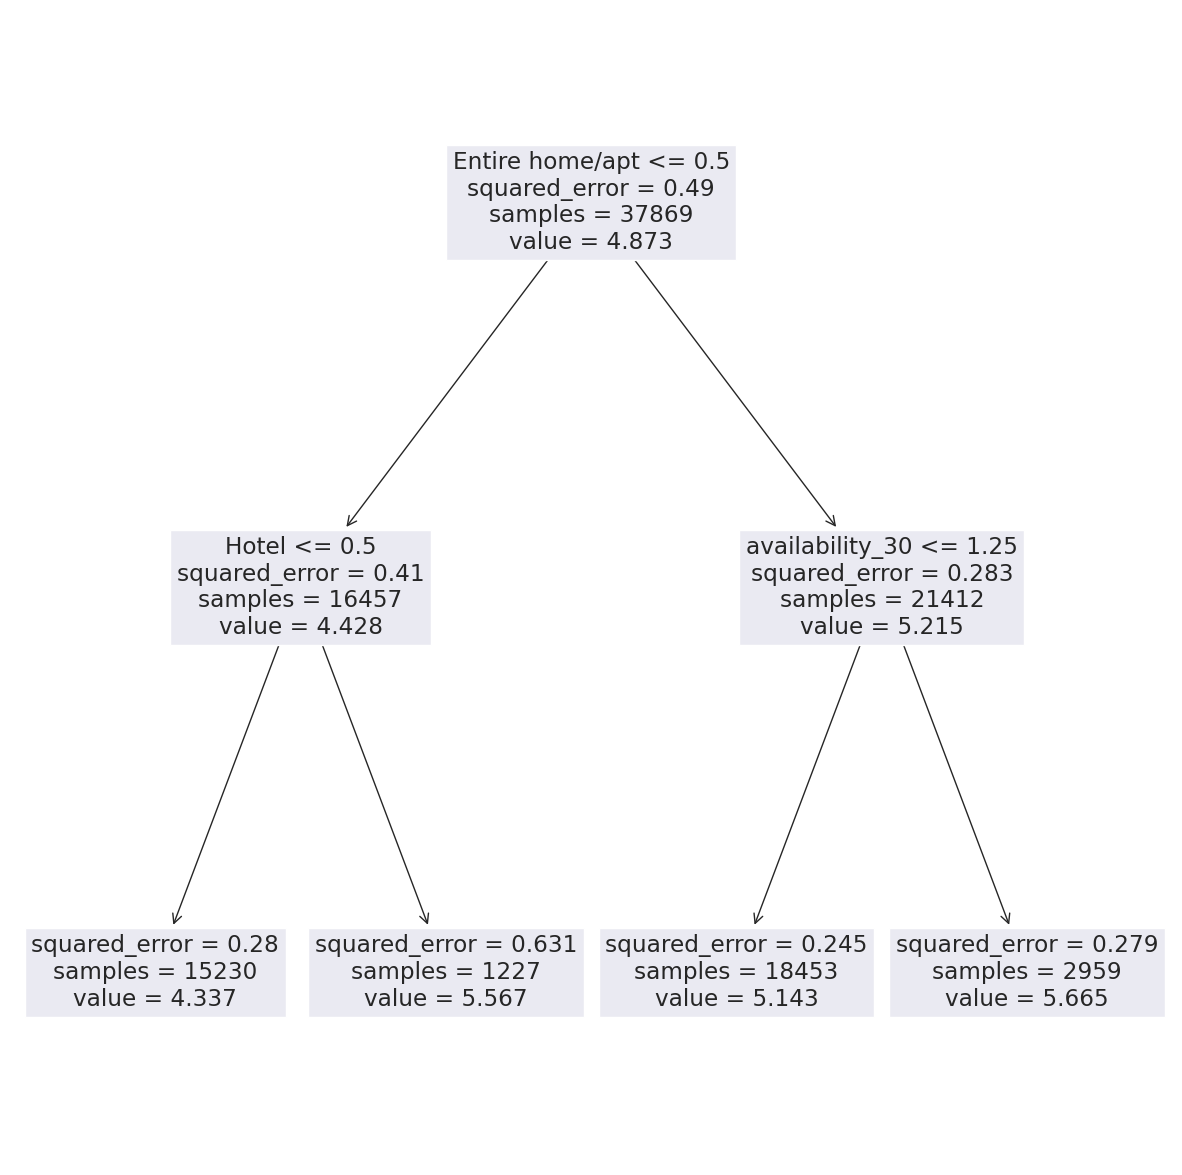

In [191]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
regressor = DecisionTreeRegressor(random_state=42, max_depth=2)
regressor.fit(X,y)
plt.figure(figsize=(15, 15))
tree.plot_tree(regressor, feature_names=feats)
plt.show()

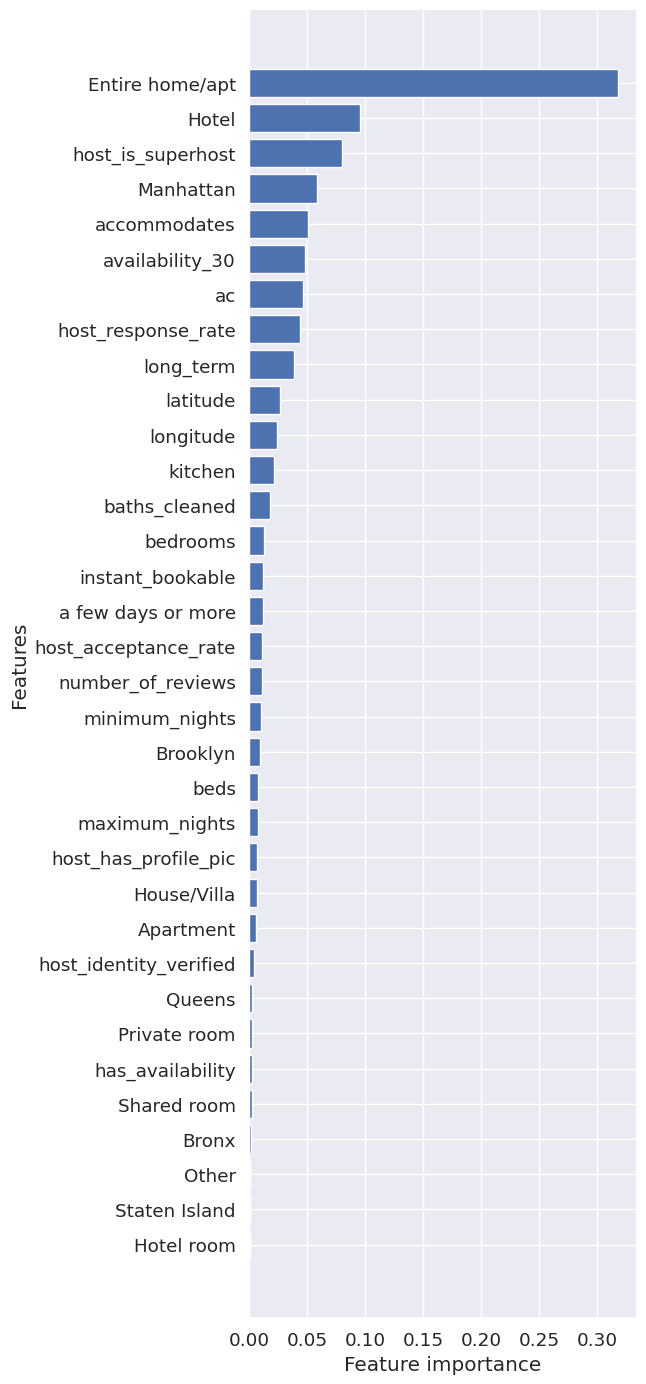

In [192]:

# solution
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

sns.set(font_scale=1.2)

def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')


dt = DecisionTreeRegressor(random_state=42)
dt.fit(X, y)

# plot feature importance
plot_feat_import(feat_list=feats, feat_import=dt.feature_importances_)


In [180]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = dt.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.468
RMSE: 0.511


In [181]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1, 20, 100], 
              'max_features': [1, 5, 15, 20],
     'max_leaf_nodes': [5, 50, 100]
}


dt_grid = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = dt_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_
best_grid

Fitting 5 folds for each of 36 candidates, totalling 180 fits


DecisionTreeRegressor(max_depth=20, max_features=20, max_leaf_nodes=100)

In [182]:
score = best_grid.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = best_grid.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.630
RMSE: 0.426


In [183]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(best_grid, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

Cross-validated R^2 score: 0.629
Cross-validated RMSE score: 0.426


## Random Forest Regressor

In [184]:
from sklearn.model_selection import train_test_split

feats = filtered.columns.difference(['price','amenities'])
X = filtered.loc[:, feats].values
y = filtered.loc[:, 'price']


# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [185]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = rf.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")


from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(rf, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.740
RMSE: 0.357
Cross-validated R^2 score: 0.745
Cross-validated RMSE score: 0.354


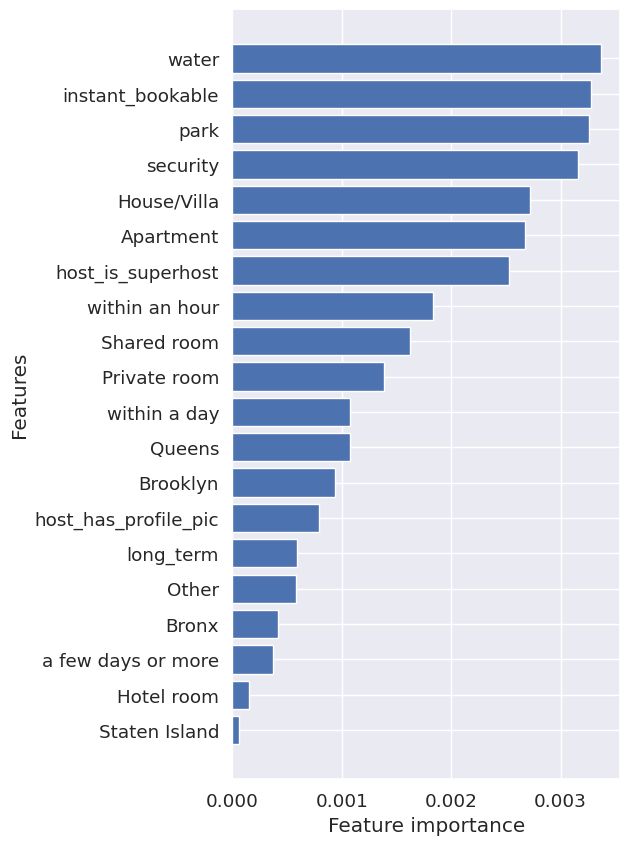

In [186]:

# solution
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X, y)

# plot feature importance
plot_feat_import(feat_list=feats, feat_import=rf_reg.feature_importances_, limit = 20)

In [187]:
x_feats = ['Apartment', 'Bronx', 'Brooklyn', 'Entire home/apt', 'Hotel',
       'Hotel room', 'House/Villa', 'Manhattan', 'Other', 'Private room',
       'Queens', 'Shared room', 'Staten Island', 'ac',
       'accommodates', 'availability_30', 'baths_cleaned', 'bedrooms', 'beds',
       'has_availability', 'host_has_profile_pic',
       'host_identity_verified',  'kitchen',  'long_term',  'minimum_nights', 'number_of_reviews', 'park',
       'review_scores_accuracy', 
       'review_scores_cleanliness',
       'review_scores_location', 'review_scores_rating', 'security', 'tv', 'water']

X = filtered.loc[:, x_feats].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = rf.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")


from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(rf, X, y, cv=kf, scoring=scoring)
mean_r2 = np.mean(scores['test_r2'])
mean_rmse = np.mean(scores['test_rmse'])
print(f"Cross-validated R^2 score: {mean_r2:.3f}")
print(f"Cross-validated RMSE score: {mean_rmse:.3f}")

R^2 score: 0.664
RMSE: 0.406
Cross-validated R^2 score: 0.661
Cross-validated RMSE score: 0.407


In [189]:
scores

{'fit_time': array([20.14899707, 20.72962689, 19.64285994, 21.1486764 , 19.90835905]),
 'score_time': array([0.37465692, 0.29789066, 0.30355144, 0.29179788, 0.30779362]),
 'test_r2': array([0.66881705, 0.67060277, 0.64485055, 0.66635287, 0.65650571]),
 'test_rmse': array([0.40438804, 0.40041244, 0.4117239 , 0.40566527, 0.4143638 ])}